#01.SETUP

In [2]:
import os

In [3]:
cd /root/Share/LOTUSROOM/lotusroom_notebooks

/root/Share/LOTUSROOM/lotusroom_notebooks


In [4]:
!pip install transformers==4.25.1
!pip install bitsandbytes-cuda111==0.26.0
!pip install datasets==1.16.1
!pip install bitsandbytes loguru
!pip install accelerate
!pip install discord.py
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors
!pip install transformers --upgrade
!pip install langdetect
!pip install scipy
!pip install tensorboard
!pip install ctranslate2 sentencepiece
!pip install -q diffusers transformers accelerate peft

  Using cached transformers-4.25.1-py3-none-any.whl.metadata (93 kB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.2
    Uninstalling tr

In [5]:
import os
from config._tokens import *
os.environ['TOKEN1'] = token1
os.environ['TOKEN2'] = token2
os.environ['TOKEN3'] = token3

#02.LOAD GPTs & SD

In [6]:
from gptj import config, tokenizer, GPTJForCausalLM
import torch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
#gpt = GPTJForCausalLM.from_pretrained("./saved_models_gpt-j-6B-8bit/gpt-j-6B",low_cpu_mem_usage=True)
gpt = GPTJForCausalLM.from_pretrained("/root/Share/LOTUSROOM/mary-shelly", revision="float16", torch_dtype=torch.float32, low_cpu_mem_usage=True)
gpt.to(device)


/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


lm_head Linear(in_features=4096, out_features=50400, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, bias=False)
out_proj Linear(in_features=4096, out_features=4096, bias=False)
fc_in Linear(in_features=4096, out_features=16384, bias=True)
fc_out Linear(in_features=16384, out_features=4096, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, bias=False)
out_proj Linear(in_features=4096, out_features=4096, bias=False)
fc_in Linear(in_features=4096, out_features=16384, bias=True)
fc_out Linear(in_features=16384, out_features=4096, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, b

Some weights of the model checkpoint at /root/Share/LOTUSROOM/mary-shelly were not used when initializing GPTJForCausalLM: ['lm_head.adapter.0.weight', 'lm_head.adapter.1.weight', 'transformer.h.0.attn.k_proj.adapter.0.weight', 'transformer.h.0.attn.k_proj.adapter.1.weight', 'transformer.h.0.attn.out_proj.adapter.0.weight', 'transformer.h.0.attn.out_proj.adapter.1.weight', 'transformer.h.0.attn.q_proj.adapter.0.weight', 'transformer.h.0.attn.q_proj.adapter.1.weight', 'transformer.h.0.attn.v_proj.adapter.0.weight', 'transformer.h.0.attn.v_proj.adapter.1.weight', 'transformer.h.0.mlp.fc_in.adapter.0.weight', 'transformer.h.0.mlp.fc_in.adapter.1.weight', 'transformer.h.0.mlp.fc_out.adapter.0.weight', 'transformer.h.0.mlp.fc_out.adapter.1.weight', 'transformer.h.1.attn.k_proj.adapter.0.weight', 'transformer.h.1.attn.k_proj.adapter.1.weight', 'transformer.h.1.attn.out_proj.adapter.0.weight', 'transformer.h.1.attn.out_proj.adapter.1.weight', 'transformer.h.1.attn.q_proj.adapter.0.weight', 't

GPTJForCausalLM(
  (transformer): GPTJModel(
    (wte): FrozenBNBEmbedding(50400, 4096)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-27): 28 x GPTJBlock(
        (ln_1): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
        (attn): GPTJAttention(
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
          (k_proj): FrozenBNBLinear(4096, 4096)
          (v_proj): FrozenBNBLinear(4096, 4096)
          (q_proj): FrozenBNBLinear(4096, 4096)
          (out_proj): FrozenBNBLinear(4096, 4096)
        )
        (mlp): GPTJMLP(
          (fc_in): FrozenBNBLinear(4096, 16384)
          (fc_out): FrozenBNBLinear(16384, 4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): FrozenBNBLinear(4096, 50400)
)

In [7]:
async def get_mary_response(prompt, min_words=128, max_words=128):
    global device, tokenizer, gpt
    prompt = tokenizer(prompt, return_tensors='pt')
    prompt = {key: value.to(device) for key, value in prompt.items()}
    out = gpt.generate(**prompt, min_length=min_words, max_length=max_words, do_sample=True)
    return tokenizer.decode(out[0])

In [8]:
from diffusers import AutoPipelineForImage2Image

#pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda:1")
pipe.load_lora_weights("/root/Share/LOTUSROOM/LoRA/diaphanera.safetensors", adapter_name="diaphanera")
pipe.set_adapters(["diaphanera"], adapter_weights=[1.0])




Loading pipeline components...: 100%|████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.68it/s]


In [9]:
from PIL import Image
init_image = Image.open("/root/Share/LOTUSROOM/ref/HR_0266.jpg").resize((900,900))

negative_prompt = "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
seed=0
generator = torch.manual_seed(seed)


In [10]:
import random
prompt_list=['a piece of agate with a red and white pattern', 'a large piece of blue and white marble', 'a piece of agate with a blue and yellow pattern', 'a large piece of agate with a very large center', 'a piece of agate with a red and white stripe', 'a green and white stone with a black background', 'a large piece of pink and white rock', 'a piece of yellow agate with black spots', 'a piece of white and gold marble with a triangle', 'a piece of red and green agate', 'a large piece of agate with a diamond in the center', 'a large piece of red and black agate', 'a piece of rock with a hole in it', 'a white vase with a green center on a black surface', 'a green and yellow stone with a black background', 'a piece of agate with a black and white pattern', 'a piece of rock with a very large piece of rock in the middle', 'a piece of rock with a very colorful pattern', 'a piece of agate with a pattern of swirls', 'a piece of agate with a face on it', 'a large piece of art with a very colorful design', 'a piece of rock with a piece of rock in it', 'a piece of agate with a hole in it', 'a large piece of rock with a very large center', 'a piece of rock with a black and white pattern', 'a blue and white piece of rock with water inside', 'a piece of agate with a yellow and white swirl', 'a piece of rock with a white object in it', 'a picture of a lake with a sky in the background', 'a piece of agate with a black bird on it', 'a piece of agate with a pattern of swirls', 'a large piece of red and white rock with a black hole', 'a piece of rock with a very large piece of rock', 'a piece of red and white rock with a black background', 'a large piece of rock with a large crystal in it', 'a piece of agate with a red and white stripe', 'a slice of agate with a black background', 'a large piece of agate with a white and blue pattern', 'a slice of agate with a red and yellow stripe', 'a piece of rock with a cross on it', 'a slice of agate with a red center', 'a large piece of white and brown agate', 'a large slice of agate with a face on it', 'a piece of rock with a very large piece of material']
base_prompt = "((((diaphanera)))), ((("+ random.choice(prompt_list) +")))"
print (base_prompt)

((((diaphanera)))), (((a piece of rock with a white object in it)))


In [11]:
def generate_sd(prompt):
    with torch.no_grad():  # 勾配計算を無効化
        base_prompt = f"diaphanera, {random.choice(prompt_list)}"
        print (base_prompt+prompt)
        image = pipe(
            prompt=f"{base_prompt}, ((({prompt})))",
            width=894,
            height=894,
            image=init_image,
            negative_prompt=negative_prompt,
            generator=generator,
            strength=0.63,
            guidance_scale=7.0,
            num_inference_steps=25).images[0]
    return image

diaphanera, a large piece of white and brown agate


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]


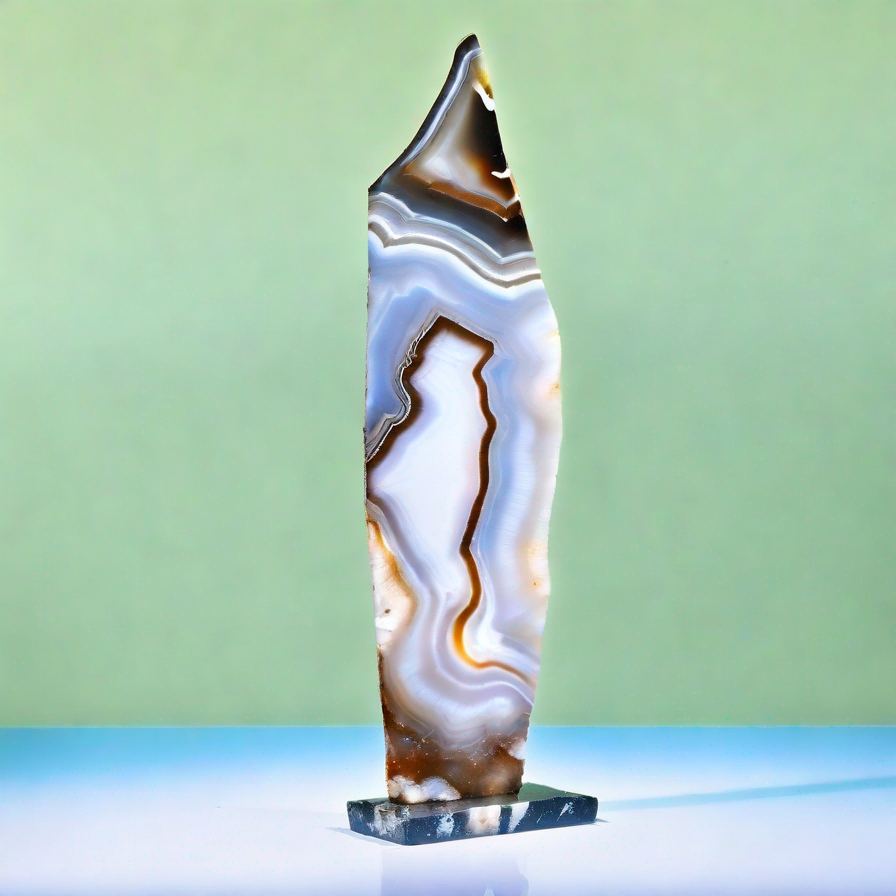

In [12]:
prompt=''
generate_sd(prompt)

In [13]:
#!pip install openai --upgrade
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install openai==0.28

# 2. APIキーを設定
import openai
import os

from config._api_key import openai_api
openai.api_key = openai_api
os.environ['OPENAI_API'] = openai_api

async def get_gpt4_response(prompt, model="gpt-4-0125-preview", tokens=1000):
    response = await openai.ChatCompletion.acreate(
        model=model,
        messages=[
            {"role": "system", "content": "You are a brilliant fashion design assistant."},
            {"role": "user", "content": prompt},
        ],
        max_tokens=tokens,
        temperature=0.7,
    )
    return response




DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [14]:
prompt='eureka'
await get_mary_response(prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'eureka.instance.hostName" value="#settings.eureka.instance.url"/>\n        </entry>\n        <entry key="eureka.instance.nonCoreServicesPort">\n            <value>8091</value>\n        </entry>\n        <entry key="eureka.instance.statusPagePath">\n            <value>/actuator/'

In [15]:
await get_gpt4_response(prompt)

<OpenAIObject chat.completion id=chatcmpl-8uB5VBEW1pE3aPBd2bsbPr1zh8fXu at 0x7fc8c5b48090> JSON: {
  "id": "chatcmpl-8uB5VBEW1pE3aPBd2bsbPr1zh8fXu",
  "object": "chat.completion",
  "created": 1708399681,
  "model": "gpt-4-0125-preview",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "It sounds like you've had a moment of inspiration or a breakthrough idea! That's fantastic! Tell me more about your idea or how I can assist you further in fleshing it out or integrating it into your fashion designs. Whether it's a concept, a specific design element, or an innovative use of materials, I'm here to help you develop and refine your vision."
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 21,
    "completion_tokens": 75,
    "total_tokens": 96
  },
  "system_fingerprint": "fp_f084bcfc79"
}

# 03.LOAD LOTUS

In [16]:
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('discord')
logger.setLevel(logging.ERROR)
handler = logging.FileHandler(filename='discord.log', encoding='utf-8', mode='w')
handler.setFormatter(logging.Formatter('%(asctime)s:%(levelname)s:%(name)s: %(message)s'))
logger.addHandler(handler)

In [17]:
from config.prompts import *

In [18]:
import discord
import os
import openai
import asyncio
import re
from datetime import datetime
import shutil
from asyncio import sleep

from langdetect import detect as lang_detect

BG_EXT = ".gif"
BG_GIF_PATH = f'/root/Share/LOTUSROOM/GDrive/3dlogo_typ_bg{BG_EXT}'

#initial
intents = discord.Intents.default()
intents.message_content = True
client_gpt = discord.Client(intents=intents)
client_mary = discord.Client(intents=intents)
client_anagami = discord.Client(intents=intents)

token_mary = os.environ['TOKEN2']
token_gpt = os.environ['TOKEN1']
token_anagami = os.environ['TOKEN3']
openai.api_key = os.environ['OPENAI_API']

client_gpt_id = None
client_mary_id = None
client_anagami_id = None
user_who_typed_mary_id = None

dialogue_log = ""
question = ""
loop_value = 1

min_words_mary = 150
max_words_mary = 250

last_mary_message_time = None
question_list = []

from config._discord import *

async def check_last_message_time():
    global last_mary_message_time
    while True:
        if last_mary_message_time:
            time_since_last_message = datetime.now() - last_mary_message_time
            if time_since_last_message.total_seconds() >= 300:  # 300 seconds = 5 minutes
                channel = discord.utils.get(client_anagami.get_all_channels(), name='your-channel-name')
                if channel:
                    await channel.send("調子はどう？")
                last_mary_message_time = None  # Reset the timer
        await asyncio.sleep(60)  # Check every minute


async def move_old_images(destination_folder, log_folder, keep_files_count=5):
    """
    Move all files except the latest 'keep_files_count' from the destination folder to the log folder.
    """
    os.makedirs(log_folder, exist_ok=True)

    files = [f for f in os.listdir(destination_folder) if os.path.isfile(os.path.join(destination_folder, f))]
    files.sort(key=lambda x: os.path.getmtime(os.path.join(destination_folder, x)), reverse=True)  # sort files by modification time

    for file in files[keep_files_count:]:  # Skip the latest 'keep_files_count' files
        old_path = os.path.join(destination_folder, file)
        new_path = os.path.join(log_folder, file)
        shutil.move(old_path, new_path)

async def save_gif(destination_folder, filename):
    """
    Save a gif file to the destination folder and then move old images to the log folder.
    """
    destination_path = f"{destination_folder}/{filename}{BG_EXT}"
    #shutil.copy2(BG_GIF_PATH, destination_path)
    current_time = datetime.now().timestamp()
    os.utime(destination_path, (current_time, current_time))

    base_directory = os.path.dirname(os.path.dirname(destination_folder))
    log_folder = os.path.join(base_directory, 'logs', os.path.basename(destination_folder))
    await move_old_images(destination_folder, log_folder, keep_files_count=5)


def response_editor(response):
  if "。" in response:
      response = response.rsplit("。", 1)[0] + "。"
  elif "." in response:
      response = response.rsplit(".", 1)[0] + "."
  elif "\n" in response:
      response = response.rsplit("\n", 1)[0]
  return response

def extract_text(pattern, text):
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return match.group(1).strip()
    return ""

@client_mary.event
async def on_ready():
  global client_mary_id
  print(f'Welcome {client_mary.user}')
  client_mary_id = client_mary.user.id

async def on_reset(message, dialogue_log, question):
    dialogue_log = ""
    question = ""
    # channel = client_mary.get_channel(message.channel.id)
    # await channel.send("（reset dialogue）")
    # channel = client_gpt.get_channel(message.channel.id)
    # await channel.send("（reset dialogue）")
    return dialogue_log, question

@client_mary.event
async def on_message(message):
  global dialogue_log, loop_value, question, question_list, last_mary_message_time
  #print(message.author.name)

  #print (state_machine.is_waiting_for_mary(), message.content)
  dialogue_log = ""

  #if message.content.startswith("/mary"):
  #if str(message.channel.id) == specific_channel_id:
  if (str(message.channel.id) in specific_channel_ids) and ((message.author.name in specific_user_names) or (message.author.id in specific_user_ids)):
    last_mary_message_time = datetime.now()
    user_who_typed_mary_id = message.author.id
    user_who_typed_mary_name = message.author.name
    dialogue_log, question = await on_reset(message, dialogue_log, question)
    loop_value = 2
    text = message.content.lstrip()
    dialogue_log += f'{user_who_typed_mary_name}: {text}\n'

    text_lang = lang_detect(text)
    await on_generate(text, message, text_lang, loop_value)

    while loop_value >1:
      await on_generate(question, message, text_lang, loop_value-1)
      loop_value -=1
    dialogue_log, question = await on_reset(message, dialogue_log, question)

    await sleep(180)

    now = datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")

    #paths = [f"/content/drive/MyDrive/HATRA24SS/raspi/pi{str(i).zfill(2)}" for i in range(1, 9)]
    paths = [f"/root/Share/LOTUSROOM/GDrive/AX01/01/"]
    for path in paths:
        await save_gif(path, f"generated_image_{date_time}")

    dialogue_log, question = await on_reset(message, dialogue_log, question)

async def on_sd(prompt, str_idx):
    image = generate_sd(prompt)
    save_path = f'/root/Share/LOTUSROOM/GDrive/AX01/{str_idx}/'
    now = datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")
    file_path = f"{save_path}generated_image_{date_time}.png"
    image.save(f"{file_path}")
    print(f"{file_path}")
    base_directory = os.path.dirname(os.path.dirname(save_path))
    log_folder = os.path.join(base_directory, 'logs', os.path.basename(save_path))
    await move_old_images(save_path, log_folder)
    return file_path

@client_mary.event
async def on_generate(prompt, message, text_lang='ja', loop_value=None):
    lang_idx = 0 if text_lang == 'ja' else 1
    global dialogue_log, question, question_list
    #print (loop_value)
    
    channel = client_mary.get_channel(message.channel.id)
    thinking_msg = await channel.send(f"（thinking...）")
    mary_raw_response = await get_mary_response(prompt, min_words_mary, max_words_mary)
    mary_response = response_editor(mary_raw_response[len(prompt):])

    dialogue_log += f'Mary: {mary_response}\n'

    await thinking_msg.delete()  # Delete the thinking message instead of the user's message
    if mary_response.strip():  # mary_responseが空白でない場合
        await message.channel.send(mary_response)
    else:
        # mary_responseが空の場合、代わりの文字列を送信
        await message.channel.send("???????")
    #await message.channel.send(mary_response)

    await client_gpt.wait_until_ready()
    channel = client_gpt.get_channel(message.channel.id)
    thinking_msg = await channel.send(f"（thinking...）")

    text = f'{GPTPROMPT_A[lang_idx]}\n{ATTENTION_MSG[lang_idx]}\nMary:{mary_response}'
    response = await get_gpt4_response(text)
    gpt_response= response['choices'][0]['message']['content']
    interpretation = extract_text(fr"{A_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
    preview_interpolation = f"```{interpretation}```"
    try:
      await thinking_msg.delete()
    except discord.errors.NotFound:
      print("The message was already deleted or not found.")
    await channel.send(preview_interpolation)

    generating_msg = await channel.send(f"（generating...）")
    #thinking_msg = await channel.send(f"（thinking...）")
    text = f'{GPTPROMPT_B[lang_idx]}\n{interpretation}'
    response = await get_gpt4_response(text)
    gpt_response= response['choices'][0]['message']['content']
    prompt_proposal = extract_text(fr"{B_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
    # preview_prompt = f"```{prompt_proposal}```"
    # try:
    #   await thinking_msg.delete()
    # except discord.errors.NotFound:
    #   print("The message was already deleted or not found.")
    # await channel.send(preview_prompt)

    
    #file_path = await on_sd(prompt_proposal, '01')
    file_path = await on_sd(prompt_proposal, '01') #2023/11/14test
    print(file_path)
    with open(file_path, 'rb') as f:
        await channel.send(file=discord.File(f))
    try:
      await generating_msg.delete()
    except discord.errors.NotFound:
            print("The message was already deleted or not found.")

    if loop_value > 1:
        thinking_msg = await channel.send(f"（thinking...）")
        text = f'{GPTPROMPT_C[lang_idx]}\n{interpretation}'
        response = await get_gpt4_response(text)
        gpt_response= response['choices'][0]['message']['content']
        question = extract_text(fr"{C_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
        question_list.append(question)
        try:
          await thinking_msg.delete()
        except discord.errors.NotFound:
          print("The message was already deleted or not found.")
        await channel.send(question)
        #for i in range(2,8):
        #  _ = await on_sd(prompt_proposal, str(i).zfill(2))
    else:
        for i in range(2,8):
          _ = await on_sd(prompt_proposal, str(i).zfill(2))
        

    dialogue_log += f'GPT4: {question}\n'

@client_gpt.event
async def on_ready():
  global client_gpt_id
  print(f'Welcome {client_gpt.user}')
  client_gpt_id = client_gpt.user.id

@client_anagami.event
async def on_ready():
  global client_anagami_id
  print(f'Welcome {client_anagami.user}')
  client_anagami_id = client_anagami.user.id

async def main():
    # Start the Discord clients
    client_tasks = asyncio.gather(
        client_mary.start(token_mary),
        client_gpt.start(token_gpt),
        client_anagami.start(token_anagami)
    )
    # Start the timer task
    timer_task = asyncio.create_task(check_last_message_time())
    # Wait for all tasks to complete
    await asyncio.gather(client_tasks, timer_task)


In [ ]:
await main()

Welcome nagami(auto)#7615
Welcome MaryGPT#9745
Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=47485 request_id=req_c1707bcd51f289b3c10da4b2a5814fa4 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4158 request_id=req_941e60ffdea626b79e97c6c8864b1070 response_code=200
Token indices sequence length is longer than the specified maximum sequence length for this model (82 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fabric and thread.)))']
Token indices sequence length is longer than the specified maximum sequence length for this model (82 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up

diaphanera, a large piece of art with a very colorful designEnigmatic journey, living adventurers, myriad staircases, cul-de-sacs whispering secrets, pursuit of the unseen inspiration, ethereal challenges manifesting as approaching zombies, a testament to resilience, hope shimmering in the quest for the novel, an odyssey in the realm of fabric and thread.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_122946.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_122946.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3619 request_id=req_a42ae70071f37d82f049e41a937f3129 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=19908 request_id=req_a10ce8eb1d801dc44dedd346cd2daeec response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7132 request_id=req_48a64683e48cf93d86c15a85b58b18ee response_code=200


diaphanera, a piece of agate with a red and white stripeApocalypse Elegance, draped silhouettes, oversized, ethereal hues, stark whites, Boxer Zombie, Times Zombie, Vision Zombie, Curry Zombie, wrap-around designs, subtle exposures, metaphorical decay meets fashion, resurrecting sophistication amidst desolation, transcending traditional zombie imagery


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_123052.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_123052.png
diaphanera, a large piece of rock with a very large centerApocalypse Elegance, draped silhouettes, oversized, ethereal hues, stark whites, Boxer Zombie, Times Zombie, Vision Zombie, Curry Zombie, wrap-around designs, subtle exposures, metaphorical decay meets fashion, resurrecting sophistication amidst desolation, transcending traditional zombie imagery


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_123100.png
diaphanera, a large piece of white and brown agateApocalypse Elegance, draped silhouettes, oversized, ethereal hues, stark whites, Boxer Zombie, Times Zombie, Vision Zombie, Curry Zombie, wrap-around designs, subtle exposures, metaphorical decay meets fashion, resurrecting sophistication amidst desolation, transcending traditional zombie imagery


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_123107.png
diaphanera, a large slice of agate with a face on itApocalypse Elegance, draped silhouettes, oversized, ethereal hues, stark whites, Boxer Zombie, Times Zombie, Vision Zombie, Curry Zombie, wrap-around designs, subtle exposures, metaphorical decay meets fashion, resurrecting sophistication amidst desolation, transcending traditional zombie imagery


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_123114.png
diaphanera, a piece of rock with a cross on itApocalypse Elegance, draped silhouettes, oversized, ethereal hues, stark whites, Boxer Zombie, Times Zombie, Vision Zombie, Curry Zombie, wrap-around designs, subtle exposures, metaphorical decay meets fashion, resurrecting sophistication amidst desolation, transcending traditional zombie imagery


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imagery )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imagery )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_123121.png
diaphanera, a large piece of red and white rock with a black holeApocalypse Elegance, draped silhouettes, oversized, ethereal hues, stark whites, Boxer Zombie, Times Zombie, Vision Zombie, Curry Zombie, wrap-around designs, subtle exposures, metaphorical decay meets fashion, resurrecting sophistication amidst desolation, transcending traditional zombie imagery


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_123128.png
diaphanera, a piece of rock with a cross on itApocalypse Elegance, draped silhouettes, oversized, ethereal hues, stark whites, Boxer Zombie, Times Zombie, Vision Zombie, Curry Zombie, wrap-around designs, subtle exposures, metaphorical decay meets fashion, resurrecting sophistication amidst desolation, transcending traditional zombie imagery


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.69it/s]
ERROR:discord.client:Attempting a reconnect in 1.51s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 0.45s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: S

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_123135.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4465 request_id=req_5dc5f7c8c8cd694ff315acb1814339b0 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4905 request_id=req_137e228958ee24cc2714bd464bcb34ad response_code=200


diaphanera, a piece of rock with a very colorful patternEthereal wanderers, cloaked in twilight mysteries, their silhouettes dancing on the border of dreams and reality, fabrics whispering ancient secrets, colors borrowed from the dusk and dawn, garments that transform with the wearer's emotions, a symphony of nature and imagination.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_123405.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_123405.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4868 request_id=req_dcef72a13d7c40c218641d320c7e39bc response_code=200
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 135, in on_message
    await on_generate(text, message, text_lang, loop_value)
  File "/tmp/ipykernel_138534/717392769.py", line 238, in on_generate
    await channel.send(question)
  File "/opt/conda/lib/python3.10/site-packages/discord/abc.py", line 1561, in send
    data = await state.http.send_message(channel.id, params=params)
  File "/opt/conda/lib/python3.10/site-packages/discord/http.py", line 745, in request
    raise HTTPException(response, data)
discord.errors.HTTPException: 400 Bad Request (error code: 50006): Cannot send an empty message
ERROR

diaphanera, a piece of red and white rock with a black backgroundEthereal expanses of unmarked white, a canvas brimming with endless possibilities, evoke deep emotions, inspired by the mythical Londvarlvitch, a realm of fleeting creativity and profound influence on souls. Designers persist in the fragile journey of transmuting ephemeral inspirations into tangible artistry, embracing the trials and transience within the fashion realm.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_123613.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_123613.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2965 request_id=req_a50dbc3cceadb057dc21d695bf5577b6 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7392 request_id=req_871dbaa425743d84d4b1c227a4b6d26e response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5135 request_id=req_ea565f61a8e929a48798d90e2a0830aa response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['piece a unique narrative.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['piece a unique narrative.)))']


diaphanera, a white vase with a green center on a black surfaceEnigmatic silhouettes, shadowy figures engaging in a clandestine rendezvous beneath a moonlit sky, garments whispering tales of rebellion and unity, textures that speak of individuality amidst conformity, colors that diverge yet harmonize, a sartorial symphony of divergent nocturnes, each piece a unique narrative.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_123703.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_123703.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a unique narrative.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a unique narrative.)))']


diaphanera, a large piece of rock with a very large centerEnigmatic silhouettes, shadowy figures engaging in a clandestine rendezvous beneath a moonlit sky, garments whispering tales of rebellion and unity, textures that speak of individuality amidst conformity, colors that diverge yet harmonize, a sartorial symphony of divergent nocturnes, each piece a unique narrative.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a unique narrative.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a unique narrative.)))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_123712.png
diaphanera, a slice of agate with a red and yellow stripeEnigmatic silhouettes, shadowy figures engaging in a clandestine rendezvous beneath a moonlit sky, garments whispering tales of rebellion and unity, textures that speak of individuality amidst conformity, colors that diverge yet harmonize, a sartorial symphony of divergent nocturnes, each piece a unique narrative.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a unique narrative.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a unique narrative.)))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_123719.png
diaphanera, a large slice of agate with a face on itEnigmatic silhouettes, shadowy figures engaging in a clandestine rendezvous beneath a moonlit sky, garments whispering tales of rebellion and unity, textures that speak of individuality amidst conformity, colors that diverge yet harmonize, a sartorial symphony of divergent nocturnes, each piece a unique narrative.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['piece a unique narrative.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['piece a unique narrative.)))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_123726.png
diaphanera, a large piece of agate with a diamond in the centerEnigmatic silhouettes, shadowy figures engaging in a clandestine rendezvous beneath a moonlit sky, garments whispering tales of rebellion and unity, textures that speak of individuality amidst conformity, colors that diverge yet harmonize, a sartorial symphony of divergent nocturnes, each piece a unique narrative.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['unique narrative.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['unique narrative.)))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_123733.png
diaphanera, a piece of agate with a face on itEnigmatic silhouettes, shadowy figures engaging in a clandestine rendezvous beneath a moonlit sky, garments whispering tales of rebellion and unity, textures that speak of individuality amidst conformity, colors that diverge yet harmonize, a sartorial symphony of divergent nocturnes, each piece a unique narrative.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['unique narrative.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['unique narrative.)))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_123740.png
diaphanera, a piece of rock with a hole in itEnigmatic silhouettes, shadowy figures engaging in a clandestine rendezvous beneath a moonlit sky, garments whispering tales of rebellion and unity, textures that speak of individuality amidst conformity, colors that diverge yet harmonize, a sartorial symphony of divergent nocturnes, each piece a unique narrative.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.69it/s]
ERROR:discord.client:Attempting a reconnect in 3.36s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 3.32s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: S

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_123747.png


ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory
ERROR:discord.client:Attempting a reconnect in 7.34s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.clien

diaphanera, a piece of agate with a blue and yellow patternabstract,landscape,shifting,sands,timeless,texture,avant-garde,silhouettes,organic,materials,ethereal,light,shadows,contrast,dynamic,flow,unending,quest,innovation,spiritual,fulfillment,modern,metaphor,exploration,fabric,techniques,unique,weaves,layered,complexity,soft,pallet,reflective,surfaces,subtle,hues,insatiable,hunger,creative,cycle


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_145047.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_145047.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5063 request_id=req_6d75f6df525ee64ffff53d7d04559392 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=24929 request_id=req_9766b0227dbec1dcf1a90b00bd0d3027 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=11806 request_id=req_68d5a77c5cd607046c20b4a56c3593dc response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['metaphorical, landscape, unconventional, materials, light, shadow, contrast,

diaphanera, a piece of yellow agate with black spotsSilk,velvet,abstract,art,innovation,lush,gardens,mystery,interdisciplinary,harmony,Crossover,Symphonies,visionary,textures,revolution,ethereal,collaboration,diverse,cultures,blending,unique,expression,futuristic,architectural,dynamic,movement,inspiration,creative,exchange,metaphorical,landscape,unconventional,materials,light,shadow,contrast,dreamy,palette,transformative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_145201.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_145201.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['exchange, metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['exchange, metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']


diaphanera, a large piece of agate with a very large centerSilk,velvet,abstract,art,innovation,lush,gardens,mystery,interdisciplinary,harmony,Crossover,Symphonies,visionary,textures,revolution,ethereal,collaboration,diverse,cultures,blending,unique,expression,futuristic,architectural,dynamic,movement,inspiration,creative,exchange,metaphorical,landscape,unconventional,materials,light,shadow,contrast,dreamy,palette,transformative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['exchange, metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['exchange, metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_145210.png
diaphanera, a large slice of agate with a face on itSilk,velvet,abstract,art,innovation,lush,gardens,mystery,interdisciplinary,harmony,Crossover,Symphonies,visionary,textures,revolution,ethereal,collaboration,diverse,cultures,blending,unique,expression,futuristic,architectural,dynamic,movement,inspiration,creative,exchange,metaphorical,landscape,unconventional,materials,light,shadow,contrast,dreamy,palette,transformative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', exchange, metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', exchange, metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_145217.png
diaphanera, a large piece of agate with a diamond in the centerSilk,velvet,abstract,art,innovation,lush,gardens,mystery,interdisciplinary,harmony,Crossover,Symphonies,visionary,textures,revolution,ethereal,collaboration,diverse,cultures,blending,unique,expression,futuristic,architectural,dynamic,movement,inspiration,creative,exchange,metaphorical,landscape,unconventional,materials,light,shadow,contrast,dreamy,palette,transformative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_145223.png
diaphanera, a piece of rock with a cross on itSilk,velvet,abstract,art,innovation,lush,gardens,mystery,interdisciplinary,harmony,Crossover,Symphonies,visionary,textures,revolution,ethereal,collaboration,diverse,cultures,blending,unique,expression,futuristic,architectural,dynamic,movement,inspiration,creative,exchange,metaphorical,landscape,unconventional,materials,light,shadow,contrast,dreamy,palette,transformative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['inspiration, creative, exchange, metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['inspiration, creative, exchange, metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_145230.png
diaphanera, a piece of rock with a very large piece of rock in the middleSilk,velvet,abstract,art,innovation,lush,gardens,mystery,interdisciplinary,harmony,Crossover,Symphonies,visionary,textures,revolution,ethereal,collaboration,diverse,cultures,blending,unique,expression,futuristic,architectural,dynamic,movement,inspiration,creative,exchange,metaphorical,landscape,unconventional,materials,light,shadow,contrast,dreamy,palette,transformative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['metaphorical, landscape, unconventional, materials, light, shadow, contrast, dreamy, palette, transformative )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_145237.png
diaphanera, a slice of agate with a red centerSilk,velvet,abstract,art,innovation,lush,gardens,mystery,interdisciplinary,harmony,Crossover,Symphonies,visionary,textures,revolution,ethereal,collaboration,diverse,cultures,blending,unique,expression,futuristic,architectural,dynamic,movement,inspiration,creative,exchange,metaphorical,landscape,unconventional,materials,light,shadow,contrast,dreamy,palette,transformative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
ERROR:discord.client:Attempting a reconnect in 0.41s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 2.19s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: S

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_145244.png


ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory
ERROR:discord.client:Attempting a reconnect in 1.72s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_

diaphanera, a piece of agate with a pattern of swirlsTwilight forests enveloped in mist, ethereal figures draped in layers of whisper-thin silk and rugged tweed, eyes gleaming like stars against the velvet night, ancient runes glimmering on flowing capes, whispers of forgotten lore entwining with the rustle of leaves.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_161016.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_161016.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3069 request_id=req_1c989fd65fd2c262ec3160ad0474148c response_code=200
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 135, in on_message
    await on_generate(text, message, text_lang, loop_value)
  File "/tmp/ipykernel_138534/717392769.py", line 238, in on_generate
    await channel.send(question)
  File "/opt/conda/lib/python3.10/site-packages/discord/abc.py", line 1561, in send
    data = await state.http.send_message(channel.id, params=params)
  File "/opt/conda/lib/python3.10/site-packages/discord/http.py", line 745, in request
    raise HTTPException(response, data)
discord.errors.HTTPException: 400 Bad Request (error code: 50006): Cannot send an empty message
Setti

diaphanera, a piece of rock with a hole in itEthereal silhouettes whispering tales of yore, juxtaposed with cutting-edge technological marvels, intricate patterns dancing on the cusp of innovation and tradition. Reimagined Heritage, a symphony of past and future, honoring roots while embracing the metamorphosis of design, textiles weaving history anew.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_170703.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_170703.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6473 request_id=req_c822970b1f48d43cd12051f29e4a0139 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 0.07s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 1.40s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in pol

diaphanera, a large piece of pink and white rockWhispering forests, ethereal, gossamer veils falling from ancient oaks, shadows dancing under the moonlit sky, faces unveiled by the caress of dawn, garments woven from the whispers of leaves, silhouettes reborn from the ashes of tradition, exploring, timeless, innovative materials, embracing the slow creation process for unique outputs.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_170824.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_170824.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', embracing the slow creation process for unique outputs.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', embracing the slow creation process for unique outputs.)))']


diaphanera, a piece of rock with a very large piece of rock in the middleWhispering forests, ethereal, gossamer veils falling from ancient oaks, shadows dancing under the moonlit sky, faces unveiled by the caress of dawn, garments woven from the whispers of leaves, silhouettes reborn from the ashes of tradition, exploring, timeless, innovative materials, embracing the slow creation process for unique outputs.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['for unique outputs.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['for unique outputs.)))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_170832.png
diaphanera, a large piece of pink and white rockWhispering forests, ethereal, gossamer veils falling from ancient oaks, shadows dancing under the moonlit sky, faces unveiled by the caress of dawn, garments woven from the whispers of leaves, silhouettes reborn from the ashes of tradition, exploring, timeless, innovative materials, embracing the slow creation process for unique outputs.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['creation process for unique outputs.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['creation process for unique outputs.)))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_170839.png
diaphanera, a large piece of agate with a very large centerWhispering forests, ethereal, gossamer veils falling from ancient oaks, shadows dancing under the moonlit sky, faces unveiled by the caress of dawn, garments woven from the whispers of leaves, silhouettes reborn from the ashes of tradition, exploring, timeless, innovative materials, embracing the slow creation process for unique outputs.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', embracing the slow creation process for unique outputs.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', embracing the slow creation process for unique outputs.)))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_170846.png
diaphanera, a piece of rock with a very large piece of rock in the middleWhispering forests, ethereal, gossamer veils falling from ancient oaks, shadows dancing under the moonlit sky, faces unveiled by the caress of dawn, garments woven from the whispers of leaves, silhouettes reborn from the ashes of tradition, exploring, timeless, innovative materials, embracing the slow creation process for unique outputs.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['for unique outputs.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['for unique outputs.)))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_170852.png
diaphanera, a large piece of white and brown agateWhispering forests, ethereal, gossamer veils falling from ancient oaks, shadows dancing under the moonlit sky, faces unveiled by the caress of dawn, garments woven from the whispers of leaves, silhouettes reborn from the ashes of tradition, exploring, timeless, innovative materials, embracing the slow creation process for unique outputs.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['for unique outputs.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['for unique outputs.)))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_170859.png
diaphanera, a large piece of blue and white marbleWhispering forests, ethereal, gossamer veils falling from ancient oaks, shadows dancing under the moonlit sky, faces unveiled by the caress of dawn, garments woven from the whispers of leaves, silhouettes reborn from the ashes of tradition, exploring, timeless, innovative materials, embracing the slow creation process for unique outputs.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.67it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_170906.png


ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=25218 request_id=req_5332906fc05b2cd21ca8bed13883db86 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5720 request_id=req_ba2591dab7e2c61d482e0864cf78fcd2 response_code=200
The following part of your input was truncated because C

diaphanera, a piece of agate with a pattern of swirlssurreal, landscape, woven, textures, avant-garde, silhouette, ethereal, colors, experimentation, abstraction, resilience, innovative, fabrics, transcending, traditional, concepts, bold, attempts, unexpected, challenges, overcoming, creative, solutions, free, thinking, design, process, importance, persistence, effort, achieving, final, masterpiece, symbolizing, trial, error, significance, continuous, struggle


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_171557.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_171557.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5573 request_id=req_c985cc3e05be6fab02502a69138d0de4 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17249 request_id=req_53f97d1742cc436cc95a28c0118dfbc7 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7587 request_id=req_0468b5c90d4877389f3da4dccfffd817 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowerin

diaphanera, a piece of red and green agatesophisticated, silhouette, career, identity, values, public, figure, attire, expression, dignified, elegance, fabric, texture, color, palette, innovative, design, professional, status, emblematic, outer, appearance, reflection, inner, worth, societal, role, tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_171653.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_171653.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']


diaphanera, a piece of rock with a very large piece of rocksophisticated, silhouette, career, identity, values, public, figure, attire, expression, dignified, elegance, fabric, texture, color, palette, innovative, design, professional, status, emblematic, outer, appearance, reflection, inner, worth, societal, role, tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_171701.png
diaphanera, a piece of agate with a hole in itsophisticated, silhouette, career, identity, values, public, figure, attire, expression, dignified, elegance, fabric, texture, color, palette, innovative, design, professional, status, emblematic, outer, appearance, reflection, inner, worth, societal, role, tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_171708.png
diaphanera, a large piece of red and black agatesophisticated, silhouette, career, identity, values, public, figure, attire, expression, dignified, elegance, fabric, texture, color, palette, innovative, design, professional, status, emblematic, outer, appearance, reflection, inner, worth, societal, role, tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_171715.png
diaphanera, a white vase with a green center on a black surfacesophisticated, silhouette, career, identity, values, public, figure, attire, expression, dignified, elegance, fabric, texture, color, palette, innovative, design, professional, status, emblematic, outer, appearance, reflection, inner, worth, societal, role, tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_171722.png
diaphanera, a piece of agate with a black bird on itsophisticated, silhouette, career, identity, values, public, figure, attire, expression, dignified, elegance, fabric, texture, color, palette, innovative, design, professional, status, emblematic, outer, appearance, reflection, inner, worth, societal, role, tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_171729.png
diaphanera, a piece of rock with a white object in itsophisticated, silhouette, career, identity, values, public, figure, attire, expression, dignified, elegance, fabric, texture, color, palette, innovative, design, professional, status, emblematic, outer, appearance, reflection, inner, worth, societal, role, tailored, fit, bespoke, craftsmanship, modern, aesthetic, visual, narrative, empowering, individual, distinct, persona, statement


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.69it/s]
ERROR:discord.client:Attempting a reconnect in 3.04s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 1.36s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: S

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_171736.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17381 request_id=req_7a379853c68448234a97963a2873415d response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=10048 request_id=req_7737a445cf7f66cce73e93040e2acde4 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['memorable, style, creation, pursuit, originality, fashion, world, visually, stunning, garment, silhouette, texture, palette )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['memorable, style, creation, pursuit, originality, fashion, world, visually, stunning, garment, silhouette, texture, palette )))']


diaphanera, a piece of rock with a black and white patterncartoon,cat,moody,magic,student,pop,culture,innovative,unique,traditional,technique,reinterpreted,visual,impact,beginner,friendly,design,approach,seven,key,points,Fusion,Fantasia,blend,old,new,elements,memorable,style,creation,pursuit,originality,fashion,world,visually,stunning,garment,silhouette,texture,palette


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_171852.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_171852.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6176 request_id=req_883c4641eef8ead1b4e9300723fbc2e9 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=30469 request_id=req_e8e4d94b71c412bcc9a22216a8d75af3 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4482 request_id=req_f6eaefabe7a67e0162e9502397c6cf03 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['vibrant, colors, textured, layers, nuanc

diaphanera, a green and yellow stone with a black backgroundethereal, fabrics, flowing, silhouettes, embodying, timeless, elegance, cultural, identity, transcending, boundaries, evoking, emotions, thought-provoking, abstract, patterns, organic, materials, artisanal, craftsmanship, visionary, artistry, juxtaposing, tradition, innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_171956.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_171956.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']


diaphanera, a large piece of rock with a large crystal in itethereal, fabrics, flowing, silhouettes, embodying, timeless, elegance, cultural, identity, transcending, boundaries, evoking, emotions, thought-provoking, abstract, patterns, organic, materials, artisanal, craftsmanship, visionary, artistry, juxtaposing, tradition, innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_172005.png
diaphanera, a piece of agate with a red and white stripeethereal, fabrics, flowing, silhouettes, embodying, timeless, elegance, cultural, identity, transcending, boundaries, evoking, emotions, thought-provoking, abstract, patterns, organic, materials, artisanal, craftsmanship, visionary, artistry, juxtaposing, tradition, innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_172012.png
diaphanera, a piece of rock with a very colorful patternethereal, fabrics, flowing, silhouettes, embodying, timeless, elegance, cultural, identity, transcending, boundaries, evoking, emotions, thought-provoking, abstract, patterns, organic, materials, artisanal, craftsmanship, visionary, artistry, juxtaposing, tradition, innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_172019.png
diaphanera, a large piece of white and brown agateethereal, fabrics, flowing, silhouettes, embodying, timeless, elegance, cultural, identity, transcending, boundaries, evoking, emotions, thought-provoking, abstract, patterns, organic, materials, artisanal, craftsmanship, visionary, artistry, juxtaposing, tradition, innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.69it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_172025.png
diaphanera, a piece of red and white rock with a black backgroundethereal, fabrics, flowing, silhouettes, embodying, timeless, elegance, cultural, identity, transcending, boundaries, evoking, emotions, thought-provoking, abstract, patterns, organic, materials, artisanal, craftsmanship, visionary, artistry, juxtaposing, tradition, innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.67it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_172032.png
diaphanera, a large piece of blue and white marbleethereal, fabrics, flowing, silhouettes, embodying, timeless, elegance, cultural, identity, transcending, boundaries, evoking, emotions, thought-provoking, abstract, patterns, organic, materials, artisanal, craftsmanship, visionary, artistry, juxtaposing, tradition, innovation, vibrant, colors, textured, layers, nuanced, shadows, light, capturing, essence, universal, appeal, emotional, resonance, sophisticated, narrative


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.66it/s]
ERROR:discord.client:Attempting a reconnect in 10.04s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(d

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_172039.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 12.47s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
F

diaphanera, a piece of rock with a white object in itShadows of foliaged narratives, hidden luminaries of Japan, 21st century backdrop, a symphony of 99 esteemed authors, emblematic of a civilizational epoch, merging tradition with contemporary flair, Echoes of Civilization, a seamless blend of past and present, innovative fashion items.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_172432.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_172432.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5208 request_id=req_0ffe3c256b8bb5588a47698b60669b47 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=22954 request_id=req_1e59074cab0ba105bf71666244332a4d response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3870 request_id=req_39c19a429501be8e7635f38f5ea4ab50 response_code=200


diaphanera, a piece of rock with a cross on itMoonlit hues transforming landscapes, a world shifting under lunar influence, revealing untold values of life, cultural upheaval as a new threat, garments embodying environmental metamorphosis, cultural shock, value shifts, Eclipsed Horizons, embodying nature's flux, cultural transformation.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_172534.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_172534.png
diaphanera, a piece of agate with a pattern of swirlsMoonlit hues transforming landscapes, a world shifting under lunar influence, revealing untold values of life, cultural upheaval as a new threat, garments embodying environmental metamorphosis, cultural shock, value shifts, Eclipsed Horizons, embodying nature's flux, cultural transformation.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_172542.png
diaphanera, a large piece of blue and white marbleMoonlit hues transforming landscapes, a world shifting under lunar influence, revealing untold values of life, cultural upheaval as a new threat, garments embodying environmental metamorphosis, cultural shock, value shifts, Eclipsed Horizons, embodying nature's flux, cultural transformation.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_172549.png
diaphanera, a large piece of red and white rock with a black holeMoonlit hues transforming landscapes, a world shifting under lunar influence, revealing untold values of life, cultural upheaval as a new threat, garments embodying environmental metamorphosis, cultural shock, value shifts, Eclipsed Horizons, embodying nature's flux, cultural transformation.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_172556.png
diaphanera, a piece of red and white rock with a black backgroundMoonlit hues transforming landscapes, a world shifting under lunar influence, revealing untold values of life, cultural upheaval as a new threat, garments embodying environmental metamorphosis, cultural shock, value shifts, Eclipsed Horizons, embodying nature's flux, cultural transformation.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_172603.png
diaphanera, a green and white stone with a black backgroundMoonlit hues transforming landscapes, a world shifting under lunar influence, revealing untold values of life, cultural upheaval as a new threat, garments embodying environmental metamorphosis, cultural shock, value shifts, Eclipsed Horizons, embodying nature's flux, cultural transformation.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.69it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_172610.png
diaphanera, a large piece of white and brown agateMoonlit hues transforming landscapes, a world shifting under lunar influence, revealing untold values of life, cultural upheaval as a new threat, garments embodying environmental metamorphosis, cultural shock, value shifts, Eclipsed Horizons, embodying nature's flux, cultural transformation.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.68it/s]
ERROR:discord.client:Attempting a reconnect in 16.46s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 3.80s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: 

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_172617.png


ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=34176 request_id=req_f50754940146160f9b194f943f52b926 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5998 request_id=req_0eb7a9695361e08b57e4d5943674d31a response_code=200
The following part of your input was truncated because C

diaphanera, a large piece of red and black agateavant-garde, fabric, transformation, ethereal, silhouette, revolutionary, impact, global, acceptance, opposition, resilience, innovative, design, theory, Reaper's Logic, texture, color palette, atmospheric, metaphorical, essence, creative, boundary-pushing, conceptual, visual, narrative, disrupt, construct, deconstruct, society, influence, futurism, abstract, expression, digital, explosion, visionary, iconic, challenge, evolution


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_173405.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_173405.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=8308 request_id=req_c65a3406fc84e1daba36355f0c9a5552 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=51096 request_id=req_1fca592aaafcfbfd6f91ce695128a9b5 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=12233 request_id=req_84021185e8cad82ff7866ce9952a1d97 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony,

diaphanera, a green and yellow stone with a black backgroundavant-garde, textured, futuristic, traditional, experimental, unique, delicate, fabric, silhouette, organic, digital, transformation, ethereal, layered, abstract, conceptual, innovative, craftsmanship, surreal, nature, urban, minimal, complex, fluid, serene, bold, intricate, monochrome, vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_173541.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_173541.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']


diaphanera, a piece of red and green agateavant-garde, textured, futuristic, traditional, experimental, unique, delicate, fabric, silhouette, organic, digital, transformation, ethereal, layered, abstract, conceptual, innovative, craftsmanship, surreal, nature, urban, minimal, complex, fluid, serene, bold, intricate, monochrome, vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', intricate, monochrome, vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', intricate, monochrome, vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_173549.png
diaphanera, a piece of rock with a very large piece of rock in the middleavant-garde, textured, futuristic, traditional, experimental, unique, delicate, fabric, silhouette, organic, digital, transformation, ethereal, layered, abstract, conceptual, innovative, craftsmanship, surreal, nature, urban, minimal, complex, fluid, serene, bold, intricate, monochrome, vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_173556.png
diaphanera, a piece of agate with a red and white patternavant-garde, textured, futuristic, traditional, experimental, unique, delicate, fabric, silhouette, organic, digital, transformation, ethereal, layered, abstract, conceptual, innovative, craftsmanship, surreal, nature, urban, minimal, complex, fluid, serene, bold, intricate, monochrome, vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_173603.png
diaphanera, a piece of rock with a very colorful patternavant-garde, textured, futuristic, traditional, experimental, unique, delicate, fabric, silhouette, organic, digital, transformation, ethereal, layered, abstract, conceptual, innovative, craftsmanship, surreal, nature, urban, minimal, complex, fluid, serene, bold, intricate, monochrome, vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_173610.png
diaphanera, a piece of agate with a face on itavant-garde, textured, futuristic, traditional, experimental, unique, delicate, fabric, silhouette, organic, digital, transformation, ethereal, layered, abstract, conceptual, innovative, craftsmanship, surreal, nature, urban, minimal, complex, fluid, serene, bold, intricate, monochrome, vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_173617.png
diaphanera, a piece of white and gold marble with a triangleavant-garde, textured, futuristic, traditional, experimental, unique, delicate, fabric, silhouette, organic, digital, transformation, ethereal, layered, abstract, conceptual, innovative, craftsmanship, surreal, nature, urban, minimal, complex, fluid, serene, bold, intricate, monochrome, vibrant, shadow, light, ephemeral, timeless, tactile, ambient, mystery, harmony, contrast, soft, dynamic


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.68it/s]
ERROR:discord.client:Attempting a reconnect in 12.93s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 10.92s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed:

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_173624.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 65.72s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


Welcome nagami(auto)#7615
Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=25425 request_id=req_bbaa01f37c792c7365983cf0d8cfce1a response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=30735 request_id=req_d2358a74a6f31e96522a35adfbe5789d response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4597 request_id=req_ffe32f869c662b25c932801dd0f5ad19 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["change, ethereal elegance, hope's silhouette )))"]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["change, ethereal elegance, hope's silhouette )))"]


diaphanera, a piece of agate with a red and white stripeEnigmatic silhouettes, whispering threads, embrace, metamorphosis, dreamscape, renewal, shadowy figures supporting one another, garments as catalysts of self-discovery, transformative echoes, reverie, intertwined destinies, fabric weaving tales of recovery, sartorial magic igniting inner change, ethereal elegance, hope's silhouette


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_173801.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_173801.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4607 request_id=req_f97417c9485f932830fbce9942e29e79 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=11108 request_id=req_5a57e5252309468086268605133a6bee response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["tranquility, magnificence, and historic shifts, echoing napoleon's transformative march, symbolizing power, change, and the individual's role within society and history, suggesting fashion's significance as a medium of self - expression, belonging, and well - being maintenance.)))"]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["tranquility, magnificence, and historic shifts, echoing napoleon's transformative m

diaphanera, a large piece of agate with a very large centerEthereal silhouettes whisper tales of joy in labor and domestic bliss, where garments embody the essence of a home encompassing the globe, vital in human composition, guardians of health and age defiance. In the serene beauty of a Seine-side village, under Parisian ramparts, fashion mirrors the tranquility, magnificence, and historic shifts, echoing Napoleon's transformative march, symbolizing power, change, and the individual's role within society and history, suggesting fashion's significance as a medium of self-expression, belonging, and well-being maintenance.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_173837.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_173837.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4395 request_id=req_33f4585227f6bcc6234354712131a90d response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Welcome MaryGPT#9745


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=16663 request_id=req_3beaa64c311c7c22cfc66901a9b40f79 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5821 request_id=req_7e5af3aee6dac0fb7218506857eb842d response_code=200


diaphanera, a piece of rock with a very colorful patternEnigmatic shadows, transformative whispers, cocooned silhouettes breaking free, ethereal textiles interwoven with the essence of rebirth, a palette of dusk and dawn, metamorphosis unveiled, exploring self-expression through the uncharted territories of fabric and form, transcending conventional identity.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_173922.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_173922.png
diaphanera, a piece of agate with a face on itEnigmatic shadows, transformative whispers, cocooned silhouettes breaking free, ethereal textiles interwoven with the essence of rebirth, a palette of dusk and dawn, metamorphosis unveiled, exploring self-expression through the uncharted territories of fabric and form, transcending conventional identity.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_173930.png
diaphanera, a large piece of pink and white rockEnigmatic shadows, transformative whispers, cocooned silhouettes breaking free, ethereal textiles interwoven with the essence of rebirth, a palette of dusk and dawn, metamorphosis unveiled, exploring self-expression through the uncharted territories of fabric and form, transcending conventional identity.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_173937.png
diaphanera, a piece of agate with a pattern of swirlsEnigmatic shadows, transformative whispers, cocooned silhouettes breaking free, ethereal textiles interwoven with the essence of rebirth, a palette of dusk and dawn, metamorphosis unveiled, exploring self-expression through the uncharted territories of fabric and form, transcending conventional identity.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_173944.png
diaphanera, a piece of agate with a red and white stripeEnigmatic shadows, transformative whispers, cocooned silhouettes breaking free, ethereal textiles interwoven with the essence of rebirth, a palette of dusk and dawn, metamorphosis unveiled, exploring self-expression through the uncharted territories of fabric and form, transcending conventional identity.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.68it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_173951.png
diaphanera, a large piece of white and brown agateEnigmatic shadows, transformative whispers, cocooned silhouettes breaking free, ethereal textiles interwoven with the essence of rebirth, a palette of dusk and dawn, metamorphosis unveiled, exploring self-expression through the uncharted territories of fabric and form, transcending conventional identity.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.67it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_173958.png
diaphanera, a slice of agate with a black backgroundEnigmatic shadows, transformative whispers, cocooned silhouettes breaking free, ethereal textiles interwoven with the essence of rebirth, a palette of dusk and dawn, metamorphosis unveiled, exploring self-expression through the uncharted territories of fabric and form, transcending conventional identity.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.66it/s]
ERROR:discord.client:Attempting a reconnect in 4.53s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=15423 request_id=req_e46b22027b1d457003361996f1d85493 response_code=200
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/7

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_174005.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2618 request_id=req_de8815af3257305724b153742044f0f7 response_code=200


diaphanera, a piece of red and white rock with a black backgroundEthereal elegance amidst conscious consumption, silhouettes whispering sustainability, fabrics caressing eco-awareness, designs rebelling against excess, garments embodying minimalism's grace, luxe textures telling tales of conservation, fashion's ode to a healthier planet, chic sustainability, elegant rebellion against overconsumption.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.65it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_174016.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_174016.png
diaphanera, a large piece of red and white rock with a black holeEthereal elegance amidst conscious consumption, silhouettes whispering sustainability, fabrics caressing eco-awareness, designs rebelling against excess, garments embodying minimalism's grace, luxe textures telling tales of conservation, fashion's ode to a healthier planet, chic sustainability, elegant rebellion against overconsumption.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.65it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_174024.png
diaphanera, a large piece of red and black agateEthereal elegance amidst conscious consumption, silhouettes whispering sustainability, fabrics caressing eco-awareness, designs rebelling against excess, garments embodying minimalism's grace, luxe textures telling tales of conservation, fashion's ode to a healthier planet, chic sustainability, elegant rebellion against overconsumption.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.61it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_174031.png
diaphanera, a piece of agate with a pattern of swirlsEthereal elegance amidst conscious consumption, silhouettes whispering sustainability, fabrics caressing eco-awareness, designs rebelling against excess, garments embodying minimalism's grace, luxe textures telling tales of conservation, fashion's ode to a healthier planet, chic sustainability, elegant rebellion against overconsumption.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.54it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_174039.png
diaphanera, a large piece of agate with a very large centerEthereal elegance amidst conscious consumption, silhouettes whispering sustainability, fabrics caressing eco-awareness, designs rebelling against excess, garments embodying minimalism's grace, luxe textures telling tales of conservation, fashion's ode to a healthier planet, chic sustainability, elegant rebellion against overconsumption.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.52it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_174046.png
diaphanera, a piece of rock with a black and white patternEthereal elegance amidst conscious consumption, silhouettes whispering sustainability, fabrics caressing eco-awareness, designs rebelling against excess, garments embodying minimalism's grace, luxe textures telling tales of conservation, fashion's ode to a healthier planet, chic sustainability, elegant rebellion against overconsumption.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.51it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_174053.png
diaphanera, a large piece of rock with a large crystal in itEthereal elegance amidst conscious consumption, silhouettes whispering sustainability, fabrics caressing eco-awareness, designs rebelling against excess, garments embodying minimalism's grace, luxe textures telling tales of conservation, fashion's ode to a healthier planet, chic sustainability, elegant rebellion against overconsumption.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.51it/s]
ERROR:discord.client:Attempting a reconnect in 38.29s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 8.03s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: 

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_174101.png


ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundE

diaphanera, a piece of rock with a cross on itsilky,fabric,digital,prints,human,emotion,interface,life,technology,evolution,fusion,modern,age,expression,texture,innovative,design,connectivity,online,shopping,nostalgic,elements,futuristic,vibrant,colours,soft,materials,interactive,garments,wearable,tech,ambient,lighting,flowing,shapes,abstract,patterns,seamless,integration,physical,digital,worlds,touch,sensory,experience


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181016.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181016.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5743 request_id=req_845786cda488ea04cb72a3748aef1c2b response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=19545 request_id=req_487bada9c154ade3a0bb30d2705cd66f response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5424 request_id=req_65c04d342f4412c2a799c24ec628be2d response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', virtual, tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', virtual, tactile, vibrant, colors, visio

diaphanera, a large piece of red and white rock with a black holefuturistic, fabrics, ethereal, atmosphere, "AnalogDigital Harmony", avant-garde, silhouette, digital, textures, innovation, sustainable, vision, contrast, blending, technology, craftsmanship, elegance, surreal, transformation, interactive, immersive, reflective, dynamic, fluidity, organic, virtual, tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181109.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181109.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']


diaphanera, a large piece of agate with a very large centerfuturistic, fabrics, ethereal, atmosphere, "AnalogDigital Harmony", avant-garde, silhouette, digital, textures, innovation, sustainable, vision, contrast, blending, technology, craftsmanship, elegance, surreal, transformation, interactive, immersive, reflective, dynamic, fluidity, organic, virtual, tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['virtual, tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['virtual, tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_181117.png
diaphanera, a piece of rock with a very large piece of rockfuturistic, fabrics, ethereal, atmosphere, "AnalogDigital Harmony", avant-garde, silhouette, digital, textures, innovation, sustainable, vision, contrast, blending, technology, craftsmanship, elegance, surreal, transformation, interactive, immersive, reflective, dynamic, fluidity, organic, virtual, tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_181124.png
diaphanera, a green and yellow stone with a black backgroundfuturistic, fabrics, ethereal, atmosphere, "AnalogDigital Harmony", avant-garde, silhouette, digital, textures, innovation, sustainable, vision, contrast, blending, technology, craftsmanship, elegance, surreal, transformation, interactive, immersive, reflective, dynamic, fluidity, organic, virtual, tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_181131.png
diaphanera, a green and white stone with a black backgroundfuturistic, fabrics, ethereal, atmosphere, "AnalogDigital Harmony", avant-garde, silhouette, digital, textures, innovation, sustainable, vision, contrast, blending, technology, craftsmanship, elegance, surreal, transformation, interactive, immersive, reflective, dynamic, fluidity, organic, virtual, tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_181138.png
diaphanera, a piece of rock with a white object in itfuturistic, fabrics, ethereal, atmosphere, "AnalogDigital Harmony", avant-garde, silhouette, digital, textures, innovation, sustainable, vision, contrast, blending, technology, craftsmanship, elegance, surreal, transformation, interactive, immersive, reflective, dynamic, fluidity, organic, virtual, tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_181145.png
diaphanera, a large piece of agate with a very large centerfuturistic, fabrics, ethereal, atmosphere, "AnalogDigital Harmony", avant-garde, silhouette, digital, textures, innovation, sustainable, vision, contrast, blending, technology, craftsmanship, elegance, surreal, transformation, interactive, immersive, reflective, dynamic, fluidity, organic, virtual, tactile, vibrant, colors, visionary, expression, culture, heritage, modernity, adaptive, luminous, abstract, narrative, connectivity


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.69it/s]
ERROR:discord.client:Attempting a reconnect in 15.35s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_181152.png
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=27220 request_id=req_f37244ca8a421c4e3d806669d596a199 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=8825 request_id=req_0b202114671e14155584a1b8d2043cdc response_code=200


diaphanera, a piece of agate with a hole in ittransformation, rebirth, avant-garde, silk, organza, ethereal, bold colors, metamorphosis, self-expression, innovative textures, fluid silhouettes, blossoming, abstract floral patterns, liberation, contemporary, visionary, dynamic contrasts, light, shadow, new beginnings


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181305.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181305.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6637 request_id=req_0776c4aaece2a3d6d87b17b191766e9d response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=14043 request_id=req_19d5959a1195a611d7168ceac9a74684 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5472 request_id=req_ef0a248f0ab33b0ea636d05da058fd1b response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']


diaphanera, a large piece of white and brown agateethereal,fabrics,whimsical,designs,transformative,joy,serenity,innovative,textures,soft,pastel,colors,dreamy,landscapes,heart-touching,emotions,comfort,unique,artistic,expressions,empowerment,through,clothing,mindful,creation,for,happiness,reflection,of,inner,beauty,eudaimonia,inspiration,bringing,peace,to,daily,lives


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181357.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181357.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['reflection, of, inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['reflection, of, inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']


diaphanera, a piece of rock with a piece of rock in itethereal,fabrics,whimsical,designs,transformative,joy,serenity,innovative,textures,soft,pastel,colors,dreamy,landscapes,heart-touching,emotions,comfort,unique,artistic,expressions,empowerment,through,clothing,mindful,creation,for,happiness,reflection,of,inner,beauty,eudaimonia,inspiration,bringing,peace,to,daily,lives


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', of, inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', of, inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_181405.png
diaphanera, a large piece of rock with a very large centerethereal,fabrics,whimsical,designs,transformative,joy,serenity,innovative,textures,soft,pastel,colors,dreamy,landscapes,heart-touching,emotions,comfort,unique,artistic,expressions,empowerment,through,clothing,mindful,creation,for,happiness,reflection,of,inner,beauty,eudaimonia,inspiration,bringing,peace,to,daily,lives


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['reflection, of, inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['reflection, of, inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_181412.png
diaphanera, a piece of rock with a piece of rock in itethereal,fabrics,whimsical,designs,transformative,joy,serenity,innovative,textures,soft,pastel,colors,dreamy,landscapes,heart-touching,emotions,comfort,unique,artistic,expressions,empowerment,through,clothing,mindful,creation,for,happiness,reflection,of,inner,beauty,eudaimonia,inspiration,bringing,peace,to,daily,lives


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_181419.png
diaphanera, a piece of red and green agateethereal,fabrics,whimsical,designs,transformative,joy,serenity,innovative,textures,soft,pastel,colors,dreamy,landscapes,heart-touching,emotions,comfort,unique,artistic,expressions,empowerment,through,clothing,mindful,creation,for,happiness,reflection,of,inner,beauty,eudaimonia,inspiration,bringing,peace,to,daily,lives


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', of, inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', of, inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_181425.png
diaphanera, a piece of agate with a pattern of swirlsethereal,fabrics,whimsical,designs,transformative,joy,serenity,innovative,textures,soft,pastel,colors,dreamy,landscapes,heart-touching,emotions,comfort,unique,artistic,expressions,empowerment,through,clothing,mindful,creation,for,happiness,reflection,of,inner,beauty,eudaimonia,inspiration,bringing,peace,to,daily,lives


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.67it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', happiness, reflection, of, inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', happiness, reflection, of, inner, beauty, eudaimonia, inspiration, bringing, peace, to, daily, lives )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_181432.png
diaphanera, a piece of rock with a very large piece of rock in the middleethereal,fabrics,whimsical,designs,transformative,joy,serenity,innovative,textures,soft,pastel,colors,dreamy,landscapes,heart-touching,emotions,comfort,unique,artistic,expressions,empowerment,through,clothing,mindful,creation,for,happiness,reflection,of,inner,beauty,eudaimonia,inspiration,bringing,peace,to,daily,lives


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.67it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_181439.png


ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=21726 request_id=req_56ac6ec82f9d08d01b5c0fe9dc220589 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5731 request_id=req_1d075f02b510fe697a5a650e5a5672dc response_code=200
The following part of your input was truncated because C

diaphanera, a piece of agate with a red and white patternabstract, silhouettes, whispering, fabric, texture, muted, colors, intricate, details, hidden, emotions, Echoes of the Gaze, reflection, society, symbolic, accessories, depth, minimalist, design, expressive, eyes, light, shadow, contrast, metaphorical, layers, introspective, contemporary, timeless, essence, subtle, complexity, innovative, craftsmanship, elegance, understated, sophistication, personal, narrative, ambiance


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181726.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181726.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7019 request_id=req_03013b7457df93ea845f4ae1526ce3a5 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=40084 request_id=req_0692178cc4b933f6e87df31f42e2de02 response_code=200
INFO:openai:message='OpenAI API response' path=https://a

diaphanera, a piece of agate with a black and white patternethereal,fabrics,whispering,woods,moonlight,shadows,translucent,layers,soft,palettes,serenity,timeless,elegance,whimsical,accents,dreamy,textures,mystical,atmosphere,haunting,beauty,silhouettes,flowing,gentle,breezes,ephemeral,moods,emotional,landscapes,airy,tulle,subtle,glow,flickering,candles,nostalgic,memories,delicate,embroideries,echoes,past,eras


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181838.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_181838.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', emotional, landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', emotional, landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']


diaphanera, a piece of agate with a black bird on itethereal,fabrics,whispering,woods,moonlight,shadows,translucent,layers,soft,palettes,serenity,timeless,elegance,whimsical,accents,dreamy,textures,mystical,atmosphere,haunting,beauty,silhouettes,flowing,gentle,breezes,ephemeral,moods,emotional,landscapes,airy,tulle,subtle,glow,flickering,candles,nostalgic,memories,delicate,embroideries,echoes,past,eras


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_181847.png
diaphanera, a piece of red and green agateethereal,fabrics,whispering,woods,moonlight,shadows,translucent,layers,soft,palettes,serenity,timeless,elegance,whimsical,accents,dreamy,textures,mystical,atmosphere,haunting,beauty,silhouettes,flowing,gentle,breezes,ephemeral,moods,emotional,landscapes,airy,tulle,subtle,glow,flickering,candles,nostalgic,memories,delicate,embroideries,echoes,past,eras


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', emotional, landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', emotional, landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_181854.png
diaphanera, a blue and white piece of rock with water insideethereal,fabrics,whispering,woods,moonlight,shadows,translucent,layers,soft,palettes,serenity,timeless,elegance,whimsical,accents,dreamy,textures,mystical,atmosphere,haunting,beauty,silhouettes,flowing,gentle,breezes,ephemeral,moods,emotional,landscapes,airy,tulle,subtle,glow,flickering,candles,nostalgic,memories,delicate,embroideries,echoes,past,eras


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['moods, emotional, landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['moods, emotional, landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_181901.png
diaphanera, a piece of rock with a very large piece of materialethereal,fabrics,whispering,woods,moonlight,shadows,translucent,layers,soft,palettes,serenity,timeless,elegance,whimsical,accents,dreamy,textures,mystical,atmosphere,haunting,beauty,silhouettes,flowing,gentle,breezes,ephemeral,moods,emotional,landscapes,airy,tulle,subtle,glow,flickering,candles,nostalgic,memories,delicate,embroideries,echoes,past,eras


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['moods, emotional, landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['moods, emotional, landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_181908.png
diaphanera, a piece of rock with a very large piece of rockethereal,fabrics,whispering,woods,moonlight,shadows,translucent,layers,soft,palettes,serenity,timeless,elegance,whimsical,accents,dreamy,textures,mystical,atmosphere,haunting,beauty,silhouettes,flowing,gentle,breezes,ephemeral,moods,emotional,landscapes,airy,tulle,subtle,glow,flickering,candles,nostalgic,memories,delicate,embroideries,echoes,past,eras


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.68it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', emotional, landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', emotional, landscapes, airy, tulle, subtle, glow, flickering, candles, nostalgic, memories, delicate, embroideries, echoes, past, eras )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_181915.png
diaphanera, a piece of agate with a yellow and white swirlethereal,fabrics,whispering,woods,moonlight,shadows,translucent,layers,soft,palettes,serenity,timeless,elegance,whimsical,accents,dreamy,textures,mystical,atmosphere,haunting,beauty,silhouettes,flowing,gentle,breezes,ephemeral,moods,emotional,landscapes,airy,tulle,subtle,glow,flickering,candles,nostalgic,memories,delicate,embroideries,echoes,past,eras


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.66it/s]
ERROR:discord.client:Attempting a reconnect in 86.92s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 542.60s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_181922.png
Welcome ChatGPT#5062


ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory


Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 0.17s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 0.41s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:ope

diaphanera, a piece of agate with a hole in itEnchanted forest, whispering winds, ethereal beings draped in twilight hues, silhouettes dancing under the moonlight, fabrics that capture the essence of dreams, mystical, avant-garde elegance, transcendent textures, interplay of shadow and light, a symphony of nature's serenity, timeless grace.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_192449.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_192449.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3099 request_id=req_09211af635c6d552f1f1e8b4a9a08be7 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 1.71s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 1.94s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in pol

diaphanera, a piece of rock with a black and white patternEnvision a realm where dawn kisses the horizon, birthing light, encapsulating the essence of renewal, adaptability, growth, intertwined with the nurturing spirit of wilderness. A canvas painted with threads of innovation, echoing the Genesis of Adaptation, silhouettes morphing like cubs in nature's embrace, evolving, flourishing.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_192539.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_192539.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["'s embrace, evolving, flourishing.)))"]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["'s embrace, evolving, flourishing.)))"]


diaphanera, a large piece of agate with a very large centerEnvision a realm where dawn kisses the horizon, birthing light, encapsulating the essence of renewal, adaptability, growth, intertwined with the nurturing spirit of wilderness. A canvas painted with threads of innovation, echoing the Genesis of Adaptation, silhouettes morphing like cubs in nature's embrace, evolving, flourishing.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["'s embrace, evolving, flourishing.)))"]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["'s embrace, evolving, flourishing.)))"]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_192547.png
diaphanera, a piece of agate with a black bird on itEnvision a realm where dawn kisses the horizon, birthing light, encapsulating the essence of renewal, adaptability, growth, intertwined with the nurturing spirit of wilderness. A canvas painted with threads of innovation, echoing the Genesis of Adaptation, silhouettes morphing like cubs in nature's embrace, evolving, flourishing.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', evolving, flourishing.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', evolving, flourishing.)))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_192554.png
diaphanera, a piece of yellow agate with black spotsEnvision a realm where dawn kisses the horizon, birthing light, encapsulating the essence of renewal, adaptability, growth, intertwined with the nurturing spirit of wilderness. A canvas painted with threads of innovation, echoing the Genesis of Adaptation, silhouettes morphing like cubs in nature's embrace, evolving, flourishing.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["'s embrace, evolving, flourishing.)))"]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["'s embrace, evolving, flourishing.)))"]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_192601.png
diaphanera, a piece of white and gold marble with a triangleEnvision a realm where dawn kisses the horizon, birthing light, encapsulating the essence of renewal, adaptability, growth, intertwined with the nurturing spirit of wilderness. A canvas painted with threads of innovation, echoing the Genesis of Adaptation, silhouettes morphing like cubs in nature's embrace, evolving, flourishing.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['embrace, evolving, flourishing.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['embrace, evolving, flourishing.)))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_192608.png
diaphanera, a piece of agate with a hole in itEnvision a realm where dawn kisses the horizon, birthing light, encapsulating the essence of renewal, adaptability, growth, intertwined with the nurturing spirit of wilderness. A canvas painted with threads of innovation, echoing the Genesis of Adaptation, silhouettes morphing like cubs in nature's embrace, evolving, flourishing.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["nature's embrace, evolving, flourishing.)))"]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["nature's embrace, evolving, flourishing.)))"]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_192615.png
diaphanera, a piece of rock with a piece of rock in itEnvision a realm where dawn kisses the horizon, birthing light, encapsulating the essence of renewal, adaptability, growth, intertwined with the nurturing spirit of wilderness. A canvas painted with threads of innovation, echoing the Genesis of Adaptation, silhouettes morphing like cubs in nature's embrace, evolving, flourishing.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.69it/s]
ERROR:discord.client:Attempting a reconnect in 7.95s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 1.21s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: S

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_192622.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=36107 request_id=req_8a075cd1c471c52f8b4b38147043c3ef response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2762 request_id=req_285a2812a9bc292f283e4efa8bc77588 response_code=200


diaphanera, a piece of rock with a piece of rock in itEnvision, ethereal realms where nature's splendor intertwines with human craftsmanship, valleys and hills meet lakes under spire-adorned skylines, embodying the fusion of organic forms with architectural prowess, exploring harmony and dialogue between Earth's wonders and mankind's creations.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_192803.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_192803.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4053 request_id=req_f541065f437f781e677f731cd363ec1c response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=36444 request_id=req_dec487e29be1c89aa721bd18f7830223 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4839 request_id=req_6a82e6901bbe0056730a72c1143cbbc8 response_code=200


diaphanera, a large piece of red and black agateethereal, silhouette, kinetic, fauna-inspired fitness apparel, second-skin T-shirts enhancing muscular motion, visually captivating, functional yet stylish bags for carrying essentials during motion, embodying joy and playfulness in everyday life, MÉLAIR - ANIMAL, melding functionality with style in daily dynamics


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_192920.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_192920.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


diaphanera, a large piece of agate with a very large centerethereal, silhouette, kinetic, fauna-inspired fitness apparel, second-skin T-shirts enhancing muscular motion, visually captivating, functional yet stylish bags for carrying essentials during motion, embodying joy and playfulness in everyday life, MÉLAIR - ANIMAL, melding functionality with style in daily dynamics


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_192928.png
diaphanera, a large piece of agate with a very large centerethereal, silhouette, kinetic, fauna-inspired fitness apparel, second-skin T-shirts enhancing muscular motion, visually captivating, functional yet stylish bags for carrying essentials during motion, embodying joy and playfulness in everyday life, MÉLAIR - ANIMAL, melding functionality with style in daily dynamics


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_192935.png
diaphanera, a piece of agate with a red and white stripeethereal, silhouette, kinetic, fauna-inspired fitness apparel, second-skin T-shirts enhancing muscular motion, visually captivating, functional yet stylish bags for carrying essentials during motion, embodying joy and playfulness in everyday life, MÉLAIR - ANIMAL, melding functionality with style in daily dynamics


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_192942.png
diaphanera, a slice of agate with a red centerethereal, silhouette, kinetic, fauna-inspired fitness apparel, second-skin T-shirts enhancing muscular motion, visually captivating, functional yet stylish bags for carrying essentials during motion, embodying joy and playfulness in everyday life, MÉLAIR - ANIMAL, melding functionality with style in daily dynamics


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_192949.png
diaphanera, a piece of agate with a red and white patternethereal, silhouette, kinetic, fauna-inspired fitness apparel, second-skin T-shirts enhancing muscular motion, visually captivating, functional yet stylish bags for carrying essentials during motion, embodying joy and playfulness in everyday life, MÉLAIR - ANIMAL, melding functionality with style in daily dynamics


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.68it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_192956.png
diaphanera, a piece of agate with a yellow and white swirlethereal, silhouette, kinetic, fauna-inspired fitness apparel, second-skin T-shirts enhancing muscular motion, visually captivating, functional yet stylish bags for carrying essentials during motion, embodying joy and playfulness in everyday life, MÉLAIR - ANIMAL, melding functionality with style in daily dynamics


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.67it/s]
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_193003.png


ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17418 request_id=req_b276967bedb10c0dcbc6c01b9bc3175f response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4311 request_id=req_35af0b071aae8bb47d5aa64213ad4f19 response_code=200


diaphanera, a piece of agate with a red and white stripeEnchanted legacy, ethereal bonds, twilight whispers, ancestral tapestry, timeless elegance, communal spirit, culinary heritage, echoes of Ritz, luminous gatherings, familial threads, whispered traditions, culinary couture, moments of celebration, interwoven destinies, silhouette of memories, gastronomic symphony


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_193722.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_193722.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3767 request_id=req_87878e7a1149ac8c795bc92fe92a2295 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=1142 request_id=req_e6a5473fa626c087bbad7484e1ec2dfc response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4070 request_id=req_ef2be2788424aa64a05d14c3e497adf7 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a narrative of mystical elegance.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a narrative of mystical elegance.)))']


diaphanera, a piece of white and gold marble with a triangleEthereal realms intertwine, where avant-garde silhouettes breathe life into the abstract. Whispers of forgotten lore, draped in otherworldly textiles, echo through the fabric of time. Silken shadows dance with the light, crafting personas that transcend the mundane, inviting the wearer into a narrative of mystical elegance.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_193803.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_193803.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a narrative of mystical elegance.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a narrative of mystical elegance.)))']


diaphanera, a piece of agate with a black bird on itEthereal realms intertwine, where avant-garde silhouettes breathe life into the abstract. Whispers of forgotten lore, draped in otherworldly textiles, echo through the fabric of time. Silken shadows dance with the light, crafting personas that transcend the mundane, inviting the wearer into a narrative of mystical elegance.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a narrative of mystical elegance.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a narrative of mystical elegance.)))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_193811.png
diaphanera, a large slice of agate with a face on itEthereal realms intertwine, where avant-garde silhouettes breathe life into the abstract. Whispers of forgotten lore, draped in otherworldly textiles, echo through the fabric of time. Silken shadows dance with the light, crafting personas that transcend the mundane, inviting the wearer into a narrative of mystical elegance.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of mystical elegance.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of mystical elegance.)))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_193818.png
diaphanera, a slice of agate with a black backgroundEthereal realms intertwine, where avant-garde silhouettes breathe life into the abstract. Whispers of forgotten lore, draped in otherworldly textiles, echo through the fabric of time. Silken shadows dance with the light, crafting personas that transcend the mundane, inviting the wearer into a narrative of mystical elegance.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['into a narrative of mystical elegance.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['into a narrative of mystical elegance.)))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_193825.png
diaphanera, a piece of rock with a very large piece of materialEthereal realms intertwine, where avant-garde silhouettes breathe life into the abstract. Whispers of forgotten lore, draped in otherworldly textiles, echo through the fabric of time. Silken shadows dance with the light, crafting personas that transcend the mundane, inviting the wearer into a narrative of mystical elegance.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a narrative of mystical elegance.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a narrative of mystical elegance.)))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_193832.png
diaphanera, a large piece of agate with a very large centerEthereal realms intertwine, where avant-garde silhouettes breathe life into the abstract. Whispers of forgotten lore, draped in otherworldly textiles, echo through the fabric of time. Silken shadows dance with the light, crafting personas that transcend the mundane, inviting the wearer into a narrative of mystical elegance.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['mystical elegance.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['mystical elegance.)))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_193839.png
diaphanera, a piece of red and green agateEthereal realms intertwine, where avant-garde silhouettes breathe life into the abstract. Whispers of forgotten lore, draped in otherworldly textiles, echo through the fabric of time. Silken shadows dance with the light, crafting personas that transcend the mundane, inviting the wearer into a narrative of mystical elegance.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.67it/s]
ERROR:discord.client:Attempting a reconnect in 15.84s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 5.68s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: 

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_193846.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=81057 request_id=req_cc9181e1df8cad2285aad203d99b0020 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2839 request_id=req_a361b8d5ca5e362840ef60f0a8ff4d8c response_code=200


diaphanera, a piece of rock with a black and white patterntransformation, journey, self-discovery, unique, emotions, mood, identity, innovative, fabric, texture, silhouette, avant-garde, non-conformist, expressive, vibrant, colors, abstract, patterns, reflection, essence


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_194048.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_194048.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6244 request_id=req_8d09b6e1a3d5f2120b86c3899b3740be response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17539 request_id=req_c8ce2d66d0ea1ece333ef3969fdeeeca response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7043 request_id=req_f269aa55bf5f0ac81021c4c4679ceaa5 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['in, design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['in, design, celebration, of, individuality, modern, urban, landscape, arti

diaphanera, a piece of agate with a black bird on itethereal,silhouettes,embracing,diversity,flowing,fabrics,vibrant,patterns,unique,identities,expressed,through,clothing,unconventional,shapes,colors,freedom,self-expression,without,boundaries,harmony,in,contrast,mix,of,textures,innovation,in,design,celebration,of,individuality,modern,urban,landscape,artistic,touches,empowering,atmosphere


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_194148.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_194148.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', in, design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', in, design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']


diaphanera, a picture of a lake with a sky in the backgroundethereal,silhouettes,embracing,diversity,flowing,fabrics,vibrant,patterns,unique,identities,expressed,through,clothing,unconventional,shapes,colors,freedom,self-expression,without,boundaries,harmony,in,contrast,mix,of,textures,innovation,in,design,celebration,of,individuality,modern,urban,landscape,artistic,touches,empowering,atmosphere


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', in, design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', in, design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_194157.png
diaphanera, a picture of a lake with a sky in the backgroundethereal,silhouettes,embracing,diversity,flowing,fabrics,vibrant,patterns,unique,identities,expressed,through,clothing,unconventional,shapes,colors,freedom,self-expression,without,boundaries,harmony,in,contrast,mix,of,textures,innovation,in,design,celebration,of,individuality,modern,urban,landscape,artistic,touches,empowering,atmosphere


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', in, design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', in, design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_194204.png
diaphanera, a large piece of agate with a white and blue patternethereal,silhouettes,embracing,diversity,flowing,fabrics,vibrant,patterns,unique,identities,expressed,through,clothing,unconventional,shapes,colors,freedom,self-expression,without,boundaries,harmony,in,contrast,mix,of,textures,innovation,in,design,celebration,of,individuality,modern,urban,landscape,artistic,touches,empowering,atmosphere


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', in, design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', in, design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_194211.png
diaphanera, a piece of rock with a piece of rock in itethereal,silhouettes,embracing,diversity,flowing,fabrics,vibrant,patterns,unique,identities,expressed,through,clothing,unconventional,shapes,colors,freedom,self-expression,without,boundaries,harmony,in,contrast,mix,of,textures,innovation,in,design,celebration,of,individuality,modern,urban,landscape,artistic,touches,empowering,atmosphere


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', design, celebration, of, individuality, modern, urban, landscape, artistic, touches, empowering, atmosphere )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_194218.png
diaphanera, a green and white stone with a black backgroundethereal,silhouettes,embracing,diversity,flowing,fabrics,vibrant,patterns,unique,identities,expressed,through,clothing,unconventional,shapes,colors,freedom,self-expression,without,boundaries,harmony,in,contrast,mix,of,textures,innovation,in,design,celebration,of,individuality,modern,urban,landscape,artistic,touches,empowering,atmosphere


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.68it/s]
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 138, in on_message
    await on_generate(question, message, text_lang, loop_value-1)
  File "/tmp/ipykernel_138534/717392769.py", line 243, in on_generate
    _ = await on_sd(prompt_proposal, str(i).zfill(2))
  File "/tmp/ipykernel_138534/717392769.py", line 155, in on_sd
    image = generate_sd(prompt)
  File "/tmp/ipykernel_138534/209844595.py", line 5, in generate_sd
    image = pipe(
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion_x

diaphanera, a large piece of art with a very colorful designethereal,fabrics,unconventional,shapes,colors,vivid,dreamscape,abstract,expressions,emotional,landscape,infinite,possibilities,innovative,textures,silhouettes,flowing,dynamic,transcending,traditional,boundaries,artistic,vision,wearable,art,conceptual,design,expressive,details,revolutionary,approach,visual,poetry,materialized,creativity,unleashed,transformative,experiences,ephemeral,beauty,conscious,craftsmanship


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_195650.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_195650.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4273 request_id=req_3ad53b5f8868aa5b92b7fd0b2ee8d1c2 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17124 request_id=req_e3b8526a93901408765006c4ab987f44 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=8274 request_id=req_19163373f67ed62d37bc0e6a95d14b47 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sustainabilit

diaphanera, a piece of yellow agate with black spotsavant-garde, transformation, digital, fabric, evolution, futuristic, texture, soft, hard, metallic, ethereal, organic, innovative, dyeing, technique, light, shadow, contrast, silhouette, ephemeral, timeless, connectivity, layers, deconstruction, reimagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, Infinite Evolution


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_195746.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_195746.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']


diaphanera, a piece of agate with a blue and yellow patternavant-garde, transformation, digital, fabric, evolution, futuristic, texture, soft, hard, metallic, ethereal, organic, innovative, dyeing, technique, light, shadow, contrast, silhouette, ephemeral, timeless, connectivity, layers, deconstruction, reimagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, Infinite Evolution


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_195753.png
diaphanera, a piece of agate with a pattern of swirlsavant-garde, transformation, digital, fabric, evolution, futuristic, texture, soft, hard, metallic, ethereal, organic, innovative, dyeing, technique, light, shadow, contrast, silhouette, ephemeral, timeless, connectivity, layers, deconstruction, reimagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, Infinite Evolution


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_195800.png
diaphanera, a green and yellow stone with a black backgroundavant-garde, transformation, digital, fabric, evolution, futuristic, texture, soft, hard, metallic, ethereal, organic, innovative, dyeing, technique, light, shadow, contrast, silhouette, ephemeral, timeless, connectivity, layers, deconstruction, reimagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, Infinite Evolution


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_195807.png
diaphanera, a piece of agate with a pattern of swirlsavant-garde, transformation, digital, fabric, evolution, futuristic, texture, soft, hard, metallic, ethereal, organic, innovative, dyeing, technique, light, shadow, contrast, silhouette, ephemeral, timeless, connectivity, layers, deconstruction, reimagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, Infinite Evolution


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_195814.png
diaphanera, a piece of yellow agate with black spotsavant-garde, transformation, digital, fabric, evolution, futuristic, texture, soft, hard, metallic, ethereal, organic, innovative, dyeing, technique, light, shadow, contrast, silhouette, ephemeral, timeless, connectivity, layers, deconstruction, reimagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, Infinite Evolution


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, infinite evolution )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_195821.png
diaphanera, a blue and white piece of rock with water insideavant-garde, transformation, digital, fabric, evolution, futuristic, texture, soft, hard, metallic, ethereal, organic, innovative, dyeing, technique, light, shadow, contrast, silhouette, ephemeral, timeless, connectivity, layers, deconstruction, reimagining, sustainability, craftsmanship, blend, colors, reflection, fluidity, adaptable, seamless, interactive, natural, synthetic, merging, tradition, innovation, Infinite Evolution


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.68it/s]
ERROR:discord.client:Attempting a reconnect in 32.34s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 55.32s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed:

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_195828.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 10.01s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=27609 request_id=req_78234959cd347ef8d99aafaa36fbd9ec response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5131 request_id=req_bcac51f1c21244fe3e748a8b47ed2114 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.)))']


diaphanera, a piece of rock with a piece of rock in itEnigmatic silhouettes dancing under moonlight, passion woven into fabric, ethereal, whispers of love echoing in the threads, garments pulsating with the heartbeat of desire, unique as snowflakes on Christmas, a symphony of style singing "you are the one I want", transformative, empowering.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_200010.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_200010.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2513 request_id=req_8ba2972c8ec97cf3c10077478eddf96c response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 186.32s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=21413 request_id=req_8ad9e4c85d5f1f6bd64264e70922093b response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=8365 reques

diaphanera, a piece of agate with a face on itEthereal whispers of time, delicate textures embracing skin, the subtle allure of hidden beauty, like strands of hair caressing the breeze, envisioning designs that transcend the tactile, embodying the unseen grace within, a celebration of intimate aesthetics, veiled yet vibrant.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_200118.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_200118.png
diaphanera, a piece of agate with a blue and yellow patternEthereal whispers of time, delicate textures embracing skin, the subtle allure of hidden beauty, like strands of hair caressing the breeze, envisioning designs that transcend the tactile, embodying the unseen grace within, a celebration of intimate aesthetics, veiled yet vibrant.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_200126.png
diaphanera, a piece of agate with a red and white patternEthereal whispers of time, delicate textures embracing skin, the subtle allure of hidden beauty, like strands of hair caressing the breeze, envisioning designs that transcend the tactile, embodying the unseen grace within, a celebration of intimate aesthetics, veiled yet vibrant.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_200133.png
diaphanera, a large piece of agate with a white and blue patternEthereal whispers of time, delicate textures embracing skin, the subtle allure of hidden beauty, like strands of hair caressing the breeze, envisioning designs that transcend the tactile, embodying the unseen grace within, a celebration of intimate aesthetics, veiled yet vibrant.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_200140.png
diaphanera, a large piece of rock with a large crystal in itEthereal whispers of time, delicate textures embracing skin, the subtle allure of hidden beauty, like strands of hair caressing the breeze, envisioning designs that transcend the tactile, embodying the unseen grace within, a celebration of intimate aesthetics, veiled yet vibrant.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.69it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_200147.png
diaphanera, a piece of rock with a white object in itEthereal whispers of time, delicate textures embracing skin, the subtle allure of hidden beauty, like strands of hair caressing the breeze, envisioning designs that transcend the tactile, embodying the unseen grace within, a celebration of intimate aesthetics, veiled yet vibrant.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.68it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_200154.png
diaphanera, a piece of agate with a yellow and white swirlEthereal whispers of time, delicate textures embracing skin, the subtle allure of hidden beauty, like strands of hair caressing the breeze, envisioning designs that transcend the tactile, embodying the unseen grace within, a celebration of intimate aesthetics, veiled yet vibrant.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.67it/s]
ERROR:discord.client:Attempting a reconnect in 0.85s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(de

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_200201.png
Welcome MaryGPT#9745


ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 150, in on_message
    await save_gif(path, f"generated_image_{date_time}")
  File "/tmp/ipykernel_138534/717392769.py", line 78, in save_gif
    os.utime(destination_path, (current_time, current_time))
FileNotFoundError: [Errno 2] No such file or directory
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 1.37s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.Connec

diaphanera, a piece of agate with a black and white patternavant-garde,silhouette,asymmetry,textural,contrast,innovative,fabric,technique,layering,ethereal,elegance,harmony,complex,geometry,monochrome,pastel,palette,deconstruction,reconstruction,visionary,artisan,craftsmanship,detail,nuance,flow,dynamic,expression,unconventional,material,mix,texture,innovation,creativity,vision,artistic,interpretation,individuality,authenticity,diversity,story


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=8111 request_id=req_8bfe8b93537c837cc84dfe155da6a1b2 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['or, artistry in motion, essence of temporal beauty, visionary construction, sartorial sophistication, celestial inspiration, cutting - edge fabric technology, profound aesthetic investigation, boundary - pushing silhouettes, transformative fashion experiences, intercultural design narratives )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['or, artistry in motion, essence of temporal beauty, visionary construction, sartorial sophistication, celestial inspiration, cutting - edge fabric technology, profound aesthetic investigation, bou

/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213240.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213240.png
diaphanera, a green and white stone with a black backgroundEthereal silhouettes, interstellar textures, cosmic elegance, avant-garde methodologies, evolutionary designs, cultural tapestries, meticulous craftsmanship, innovative materials, transcending trends, quantum leap in fashion aesthetics, amalgamation of tradition and futurism, exploration of fabric physics, homage to scientific rigor, artistry in motion, essence of temporal beauty, visionary construction, sartorial sophistication, celestial inspiration, cutting-edge fabric technology, profound aesthetic investigation, boundary-pushing silhouettes, transformative fashion experiences, intercultural design narratives


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213247.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213247.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 1.12s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6512 request_id=req_40a9b66bd9d6a6cb8b722e84f6847d54 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7781 request_id=req_cf15fe72524fb05c55176c59c

diaphanera, a piece of rock with a hole in itethereal,fabrics,whimsical,shapes,mushroom-inspired,silhouettes,confectionary,colors,bioluminescence,textural,diversity,avant-garde,fantasy,forest,ecosystem,innovative,materials,otherworldly,glow,translucent,layers,organic,patterns,mystical,aura,soft,dynamic,flow,illuminated,accents,playful,interaction,environmental,consciousness,sustainable,fashion,futuristic,interpretation,nature-inspired,expressions


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6892 request_id=req_c74dd3369cbce2eee969cbe78adefffd response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovative, silhouettes, bold, colors, soft, pastels, contrast, modern, classic, elements, visionary, designs )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovative, silhouettes, bold, colors, soft, pastels, contrast, modern, classic, elements, visionary, designs )))']


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213424.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213424.png
diaphanera, a white vase with a green center on a black surfaceethereal,woman,defying,social,norms,expressing,inner,voice,questioning,fashion,industry,framework,seeking,new,aesthetics,importance,education,tradition,maintaining,difficulty,unique,beauty,emerging,from,within,fabric,texture,atmosphere,innovative,silhouettes,bold,colors,soft,pastels,contrast,modern,classic,elements,visionary,designs


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=20512 request_id=req_1865b3deaddd3005cf4c4cf69a11a083 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=15573 request_id=req_63622a2d30c34c774cf493991d0931b2 response_code=200


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213431.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213431.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4288 request_id=req_bc6681941546a1c19c22d58f92ebee25 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5133 request_id=req_3bce606de3af6f9b80c5589f29cede0a response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7154 request_id=req_7c96965fef7e463e54e5a49360d5e72c response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']


diaphanera, a slice of agate with a red and yellow stripeEthereal silhouettes, ancient textures, celestial hues, whispers of forgotten civilizations, timeless craftsmanship, interwoven histories, cultural reawakening, contemporary echoes, global heritage, artisanal revival, lost civilizations, modern exploration, humanity's legacy, sartorial storytelling, transcendent fabrics, cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213446.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213446.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']


diaphanera, a piece of white and gold marble with a triangleEthereal silhouettes, ancient textures, celestial hues, whispers of forgotten civilizations, timeless craftsmanship, interwoven histories, cultural reawakening, contemporary echoes, global heritage, artisanal revival, lost civilizations, modern exploration, humanity's legacy, sartorial storytelling, transcendent fabrics, cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_213508.png
diaphanera, a blue and white piece of rock with water insideEthereal silhouettes, ancient textures, celestial hues, whispers of forgotten civilizations, timeless craftsmanship, interwoven histories, cultural reawakening, contemporary echoes, global heritage, artisanal revival, lost civilizations, modern exploration, humanity's legacy, sartorial storytelling, transcendent fabrics, cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_213514.png
diaphanera, a large slice of agate with a face on itEthereal silhouettes, ancient textures, celestial hues, whispers of forgotten civilizations, timeless craftsmanship, interwoven histories, cultural reawakening, contemporary echoes, global heritage, artisanal revival, lost civilizations, modern exploration, humanity's legacy, sartorial storytelling, transcendent fabrics, cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_213521.png
diaphanera, a piece of rock with a white object in itEthereal silhouettes, ancient textures, celestial hues, whispers of forgotten civilizations, timeless craftsmanship, interwoven histories, cultural reawakening, contemporary echoes, global heritage, artisanal revival, lost civilizations, modern exploration, humanity's legacy, sartorial storytelling, transcendent fabrics, cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.69it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_213528.png
diaphanera, a piece of red and green agateEthereal silhouettes, ancient textures, celestial hues, whispers of forgotten civilizations, timeless craftsmanship, interwoven histories, cultural reawakening, contemporary echoes, global heritage, artisanal revival, lost civilizations, modern exploration, humanity's legacy, sartorial storytelling, transcendent fabrics, cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.68it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.)))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240220_213535.png
diaphanera, a piece of agate with a black bird on itEthereal silhouettes, ancient textures, celestial hues, whispers of forgotten civilizations, timeless craftsmanship, interwoven histories, cultural reawakening, contemporary echoes, global heritage, artisanal revival, lost civilizations, modern exploration, humanity's legacy, sartorial storytelling, transcendent fabrics, cultural tapestry, rediscovered techniques, aesthetic renaissance, forgotten stars, visionary design.


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.68it/s]
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=8840 request_id=req_990b08dc8f7bcc9279105fbcc6678f9e response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', freedom, individuality, symbolic, metaphorical, innate, expressionism, artistic, whimsy, unique, identity, transformation, perception, manifestation, diversity, exploration )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', freedom, individuality, symbolic, metaphorical, innate, expressionism, artistic, whimsy, unique, identity, transformation, perception, manifestation, diversity, exploration )))']


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240220_213542.png
diaphanera, a piece of agate with a black and white patternabstract,expression,vivid,textures,avant-garde,silhouette,ethereal,fabric,innovation,contrast,palette,dreamscape,unconventional,fluidity,transcendence,ephemeral,alchemy,mystique,canvas,limitless,imagination,visionary,inspiration,creativity,unbound,freedom,individuality,symbolic,metaphorical,innate,expressionism,artistic,whimsy,unique,identity,transformation,perception,manifestation,diversity,exploration


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.67it/s]
ERROR:discord.client:Attempting a reconnect in 0.04s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 1.11s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: S

/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213549.png
/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240220_213549.png


ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_138534/717392769.py", line 135, in on_message
    await on_generate(text, message, text_lang, loop_value)
  File "/tmp/ipykernel_138534/717392769.py", line 238, in on_generate
    await channel.send(question)
  File "/opt/conda/lib/python3.10/site-packages/discord/abc.py", line 1561, in send
    data = await state.http.send_message(channel.id, params=params)
  File "/opt/conda/lib/python3.10/site-packages/discord/http.py", line 745, in request
    raise HTTPException(response, data)
discord.errors.HTTPException: 400 Bad Request (error code: 50006): Cannot send an empty message
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['freedom, individuality, symbolic, metaphorical, innate, expressionism, arti

diaphanera, a piece of rock with a very colorful patternabstract,expression,vivid,textures,avant-garde,silhouette,ethereal,fabric,innovation,contrast,palette,dreamscape,unconventional,fluidity,transcendence,ephemeral,alchemy,mystique,canvas,limitless,imagination,visionary,inspiration,creativity,unbound,freedom,individuality,symbolic,metaphorical,innate,expressionism,artistic,whimsy,unique,identity,transformation,perception,manifestation,diversity,exploration


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.66it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', freedom, individuality, symbolic, metaphorical, innate, expressionism, artistic, whimsy, unique, identity, transformation, perception, manifestation, diversity, exploration )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', freedom, individuality, symbolic, metaphorical, innate, expressionism, artistic, whimsy, unique, identity, transformation, perception, manifestation, diversity, exploration )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240220_213557.png
diaphanera, a piece of rock with a white object in itabstract,expression,vivid,textures,avant-garde,silhouette,ethereal,fabric,innovation,contrast,palette,dreamscape,unconventional,fluidity,transcendence,ephemeral,alchemy,mystique,canvas,limitless,imagination,visionary,inspiration,creativity,unbound,freedom,individuality,symbolic,metaphorical,innate,expressionism,artistic,whimsy,unique,identity,transformation,perception,manifestation,diversity,exploration


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.64it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['creativity, unbound, freedom, individuality, symbolic, metaphorical, innate, expressionism, artistic, whimsy, unique, identity, transformation, perception, manifestation, diversity, exploration )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['creativity, unbound, freedom, individuality, symbolic, metaphorical, innate, expressionism, artistic, whimsy, unique, identity, transformation, perception, manifestation, diversity, exploration )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240220_213604.png
diaphanera, a piece of rock with a very large piece of rock in the middleabstract,expression,vivid,textures,avant-garde,silhouette,ethereal,fabric,innovation,contrast,palette,dreamscape,unconventional,fluidity,transcendence,ephemeral,alchemy,mystique,canvas,limitless,imagination,visionary,inspiration,creativity,unbound,freedom,individuality,symbolic,metaphorical,innate,expressionism,artistic,whimsy,unique,identity,transformation,perception,manifestation,diversity,exploration


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.62it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', freedom, individuality, symbolic, metaphorical, innate, expressionism, artistic, whimsy, unique, identity, transformation, perception, manifestation, diversity, exploration )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', freedom, individuality, symbolic, metaphorical, innate, expressionism, artistic, whimsy, unique, identity, transformation, perception, manifestation, diversity, exploration )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240220_213611.png
diaphanera, a blue and white piece of rock with water insideabstract,expression,vivid,textures,avant-garde,silhouette,ethereal,fabric,innovation,contrast,palette,dreamscape,unconventional,fluidity,transcendence,ephemeral,alchemy,mystique,canvas,limitless,imagination,visionary,inspiration,creativity,unbound,freedom,individuality,symbolic,metaphorical,innate,expressionism,artistic,whimsy,unique,identity,transformation,perception,manifestation,diversity,exploration


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:06<00:00,  2.23it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['freedom, individuality, symbolic, metaphorical, innate, expressionism, artistic, whimsy, unique, identity, transformation, perception, manifestation, diversity, exploration )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240220_213630.png
diaphanera, a piece of rock with a hole in itabstract,expression,vivid,textures,avant-garde,silhouette,ethereal,fabric,innovation,contrast,palette,dreamscape,unconventional,fluidity,transcendence,ephemeral,alchemy,mystique,canvas,limitless,imagination,visionary,inspiration,creativity,unbound,freedom,individuality,symbolic,metaphorical,innate,expressionism,artistic,whimsy,unique,identity,transformation,perception,manifestation,diversity,exploration
